 **CAPSTONE PROJECT (ADVANCED DATA ANALYSIS COURSE BY GOOGLE CAREER)**

# **IMPORT PACKAGES AND FILES**

In [1]:
# Import operating libraries and packages
import numpy as np
import pandas as pd

# Import visualization libraries and packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import modeling libraries and packages

# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Support algorithms
from sklearn.model_selection import GridSearchCV, train_test_split
# XGBoost and support
from xgboost import XGBClassifier
from xgboost import plot_importance

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn import metrics

# For saving models
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [4]:
# Upload file from local
from google.colab import files
uploaded = files.upload()

Saving HR_capstone_dataset.csv to HR_capstone_dataset.csv


In [5]:
df = pd.read_csv('HR_capstone_dataset.csv')

In [6]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

# **BUSINESS SCENARIO AND DATA DESCRIPTION**

## Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee turnover rate at the company. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. Leaving, in this case, includes voluntarily quit and terminated by reconstruction or poor performance. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Description about the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

# **EDA AND NAVIGATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## OVERVIEW:
- The dataset has no missing values in any column.
- The dataset contains 14,999 rows and 10 columns.
- Data types:
  + 2 columns are of type float64 (continuous numerical values).
  + 6 columns are of type int64 (discrete numerical values).
  + 2 columns are of type object (likely categorical: Department, salary).
- Some names are not of the same format as others (Work_accident, Department)
- The column name time_spend_company can be renamed for better readability
- Misspelling column name (average_montly_hours)

In [7]:
# Rename the columns
df.rename(columns = {'Work_accident': 'work_accident','Department':'department','time_spend_company': 'tenure','average_montly_hours': 'average_monthly_hours'}, inplace = True)

In [8]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

## DUPLICATION CHECK

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(3008)

So there are duplicated observations, we will inspect them

In [10]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

satisfaction_level  last_evaluation  number_project  \
30                   0.09             0.62               6   
12030                0.09             0.62               6   
14241                0.09             0.62               6   
71                   0.09             0.77               5   
12071                0.09             0.77               5   
...                   ...              ...             ...   
13089                1.00             0.88               6   
11375                1.00             0.93               5   
13586                1.00             0.93               5   
10691                1.00             0.93               5   
12902                1.00             0.93               5   

       average_monthly_hours  tenure  work_accident  left  \
30                       294       4              0     1   
12030                    294       4              0     1   
14241                    294       4              0     1   
71                       275       4              0     1   
12071                    275       4              0     1   
...                      ...     ...            ...   ...   
13089                    201       4              0     0   
11375                    167       3              0     0   
13586                    167       3              0     0   
10691                    231       2              0     0   
12902                    231       2              0     0   

       promotion_last_5years   department  salary  
30                         0   accounting     low  
12030                      0   accounting     low  
14241                      0   accounting     low  
71                         0  product_mng  medium  
12071                      0  product_mng  medium  
...                      ...          ...     ...  
13089                      0    technical     low  
11375                      0        sales  medium  
13586                      0        sales  medium  
10691                      0    marketing  medium  
12902                      0    marketing  medium  

[5346 rows x 10 columns]

The dataset shows that there are many completely duplicated rows. This could be due to different employees having identical observations across all attributes, although this scenario is quite rare. A more likely explanation is data entry errors.

Furthermore, since these duplicated rows do not provide any new insights for analyzing the reasons behind employee turnover, we will remove them — even though they appear to make up a large portion of the dataset (around 20%). However, we will save the new dataset as a new variable, in case we need the original one.

In [11]:
df1 = df.drop_duplicates(keep = 'first')

# Check the implementation
df1.duplicated().sum()

np.int64(0)

In [12]:
# Check the size of the alternated dataset
df1.shape

(11991, 10)

## DISTRIBUTION CHECK

### Numerical columns

In [ ]:
# Descriptive analysis
df1.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours        tenure  work_accident          left  \
count           11991.000000  11991.000000   11991.000000  11991.000000   
mean              200.473522      3.364857       0.154282      0.166041   
std                48.727813      1.330240       0.361234      0.372133   
min                96.000000      2.000000       0.000000      0.000000   
25%               157.000000      3.000000       0.000000      0.000000   
50%               200.000000      3.000000       0.000000      0.000000   
75%               243.000000      4.000000       0.000000      0.000000   
max               310.000000     10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

All the statistics seem to be normal, we will then check the distribution of each column

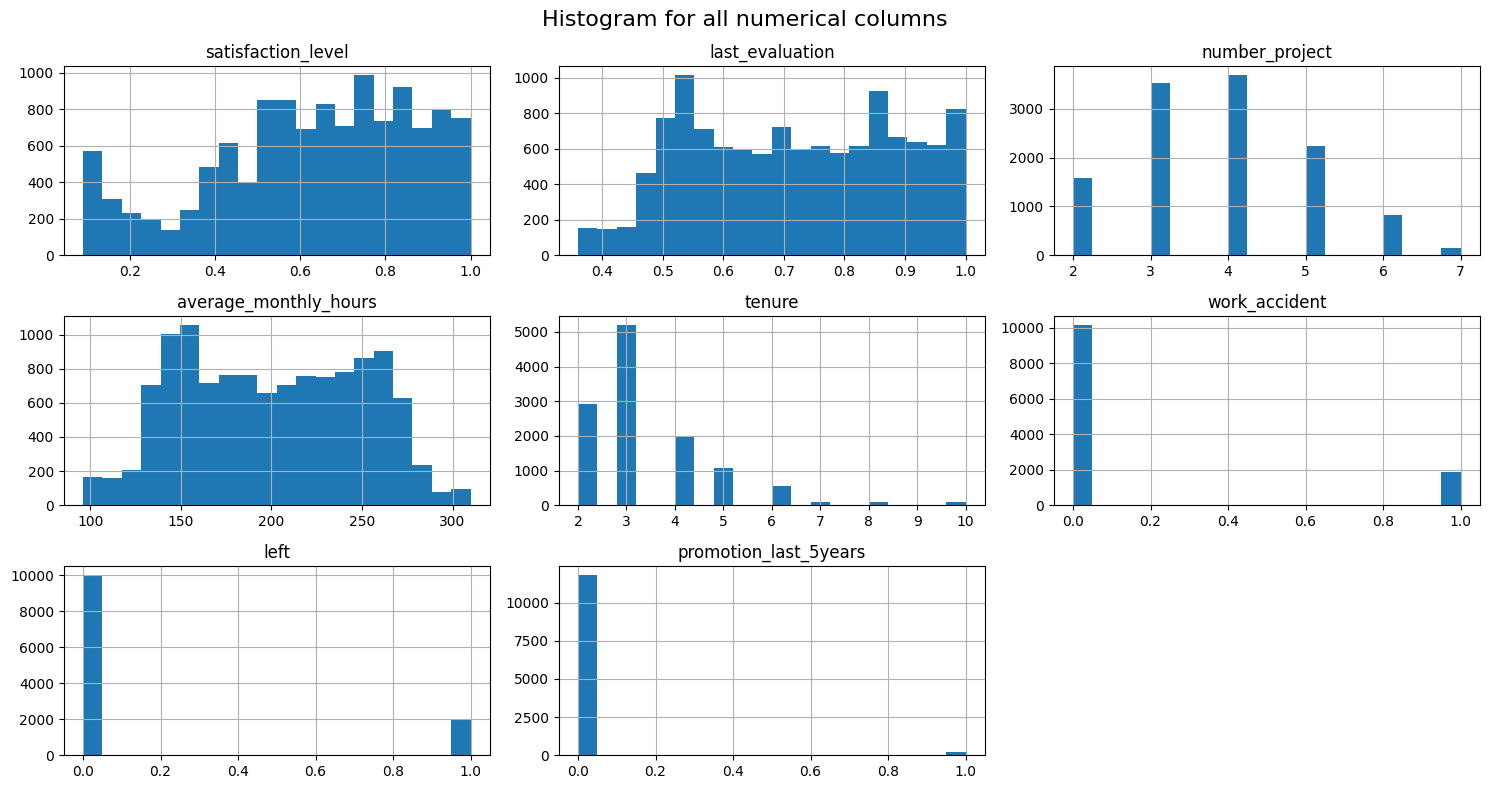

In [ ]:
# Histogram
df1.hist(figsize=(15,8),bins=20)
plt.suptitle('Histogram for all numerical columns', fontsize=16)
plt.tight_layout()
plt.show()

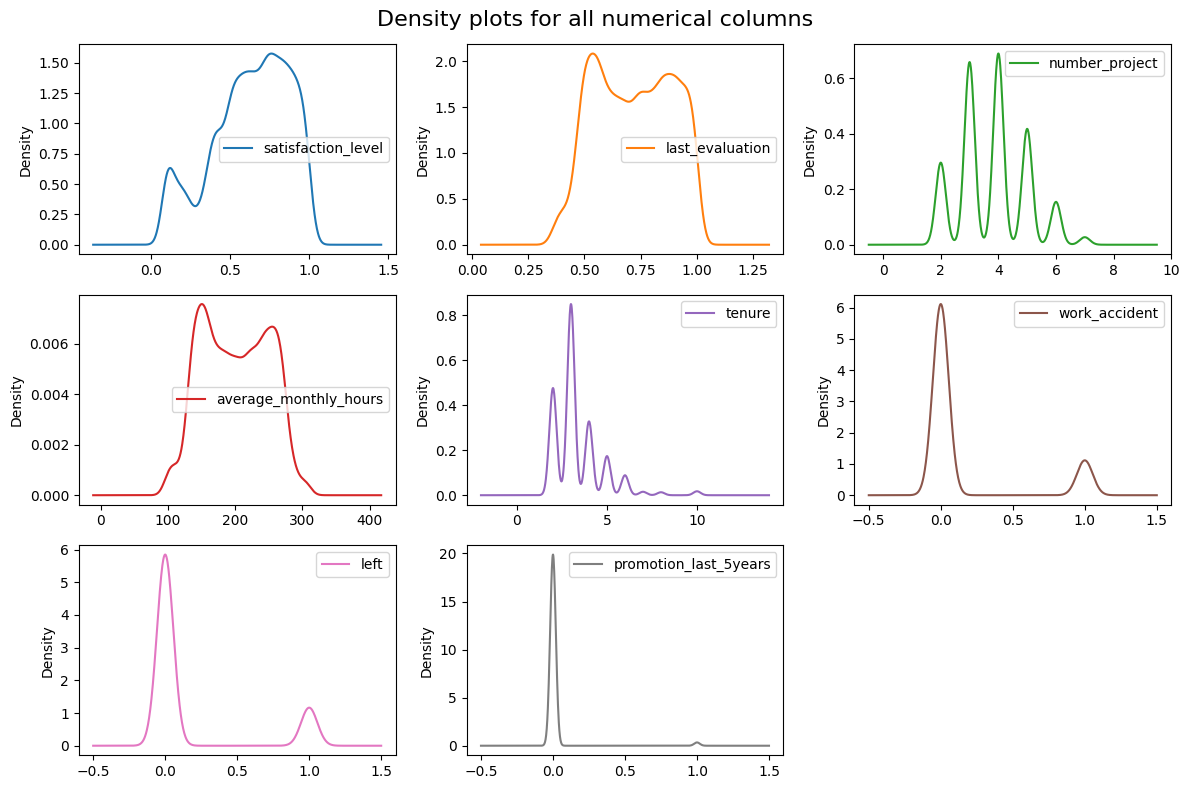

In [ ]:
# Density plot
df1.select_dtypes(include='number').plot(kind='density', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False)
plt.suptitle('Density plots for all numerical columns', fontsize=16)
plt.tight_layout()
plt.show()

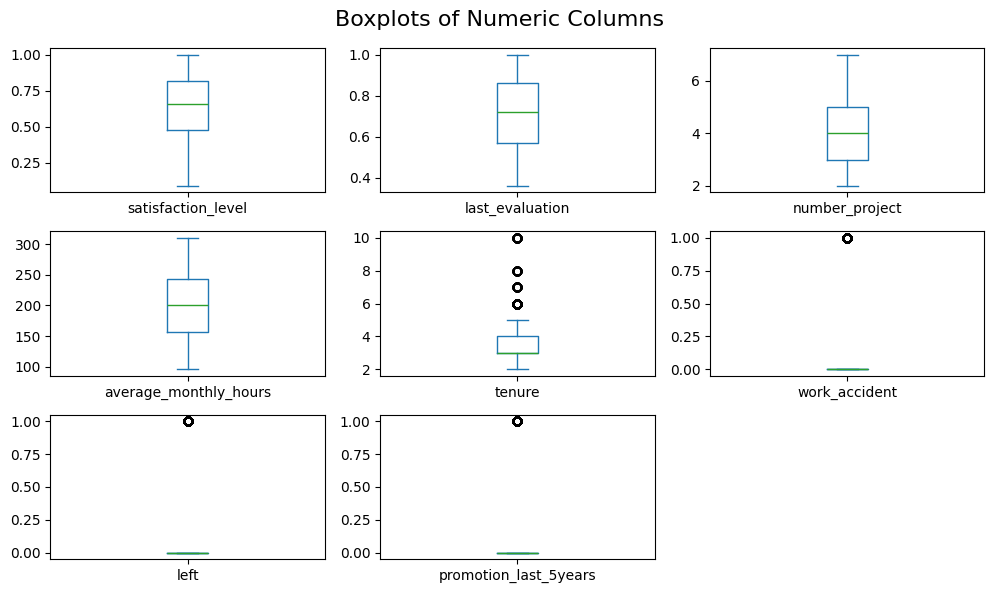

In [ ]:
# Boxplot
df1.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 6), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

Observations:
- The data in most columns does not appear to follow a normal distribution.
- The columns `work_accident`, `left`, and `promoted_last_5yrs` contain only values 0 and 1, which aligns with their initial descriptions.
- Outliers appear in the `tenure` column. Note that the outliers in `work_accident`, `left`, and `promoted_last_5yrs` columns are not actual outliers, since these columns only contain 2 values, and one value (0) outnumbers the other.

Outliers in the `tenure` column are expected, as some employees naturally have longer service durations than others. Therefore, we will retain these values. However, if we later apply a model that is sensitive to outliers—such as logistic regression—these values should be removed.

Next, we will navigate the distribution of categorical columns

### Categorical columns

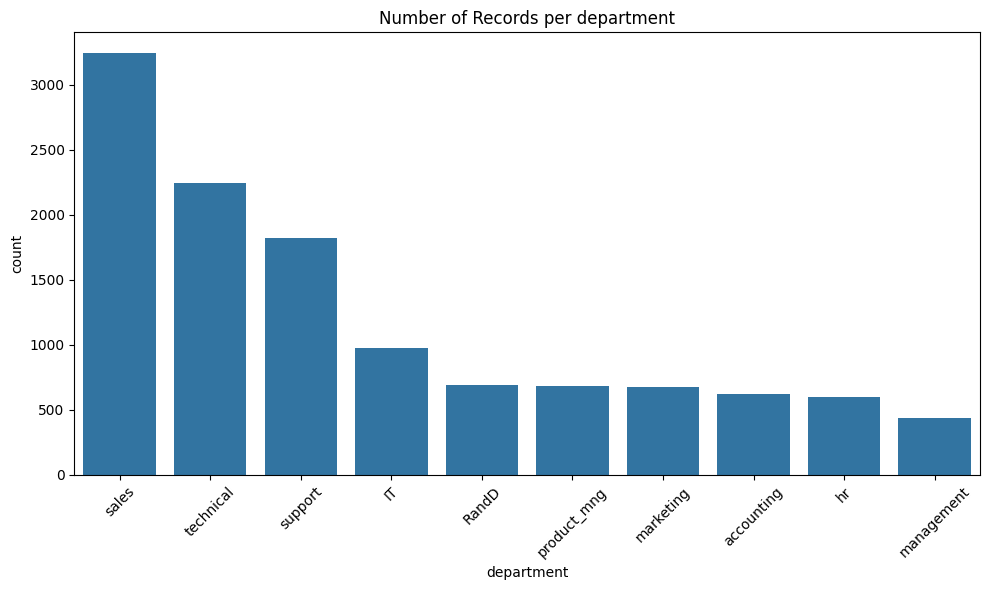

In [ ]:
# Barplot of counts per department
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='department', order=df1['department'].value_counts().index)
plt.title('Number of Records per department')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Notice that the names of these values are not easy to read, we will add some adjustment

In [ ]:
# Get the names
df1['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
# Change the names
df1['department'] = df1['department'].replace({
    'sales': 'Sales',
    'accounting': 'Accounting',
    'hr': 'Human Resources',
    'technical': 'Technical',
    'support': 'Support',
    'management': 'Management',
    'IT': 'IT',
    'product_mng': 'Product Management',
    'marketing': 'Marketing',
    'RandD': 'R&D'
})

/tmp/ipython-input-13-2512765592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['department'] = df1['department'].replace({


In [14]:
# Check the implementation
df1['department'].unique()

array(['Sales', 'Accounting', 'Human Resources', 'Technical', 'Support',
       'Management', 'IT', 'Product Management', 'Marketing', 'R&D'],
      dtype=object)

The Sales department has the highest number of recorded employees among all departments. However, this does not necessarily imply that it also has the highest—or lowest—employee turnover. The relationship between department and turnover will be examined in a later analysis.

### Class imbalance check

In [ ]:
df1['left'].value_counts(normalize = True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

Approximately 16.6% of employees in the dataset have left the company, while the remaining 83.4% have stayed.
This indicates that the overall employee turnover rate is relatively low in this dataset, and an imbalance exists. Although not immediately severe, this level of turnover may still warrant further analysis—especially if it varies significantly across departments or is linked to other risk factors.

In [ ]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

## TURNOVER ANALYSIS

### Turnover by department

Text(0.5, 1.0, 'Turnover by department')

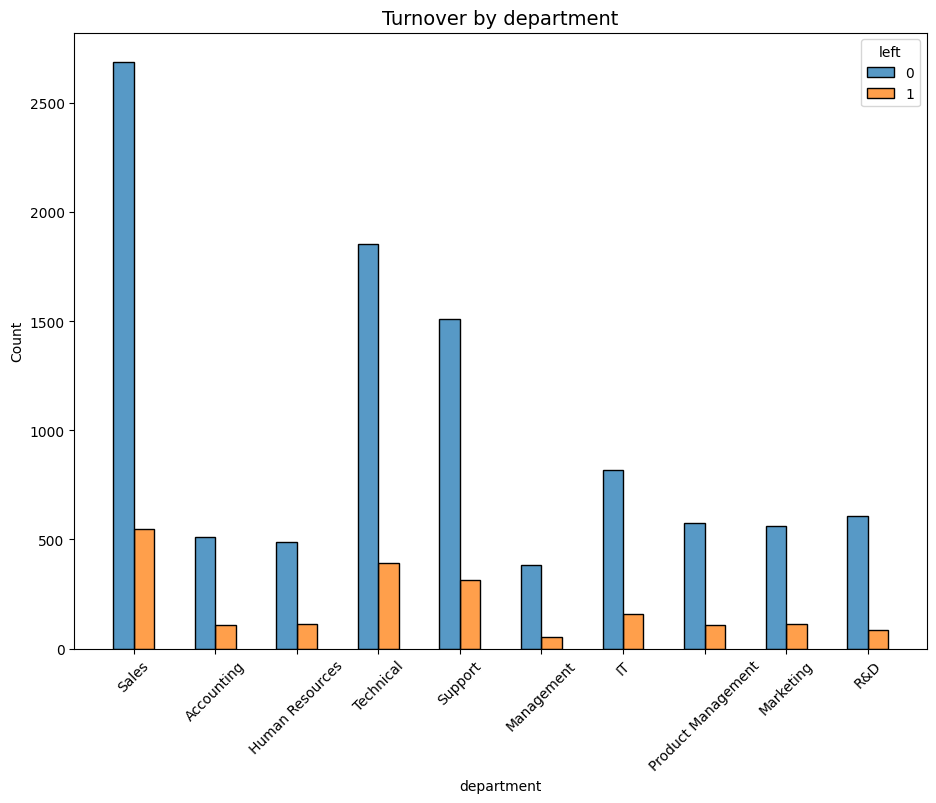

In [ ]:
# Show the turnover by department
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Turnover by department', fontsize=14)
plt.tight_layout()
plt.show()

Although this visualization provides a clear view on the number of employees in each department comparing the left and stayed one, it is difficult to point out the department with highest turnover rate, so we will select a more explanatory plot

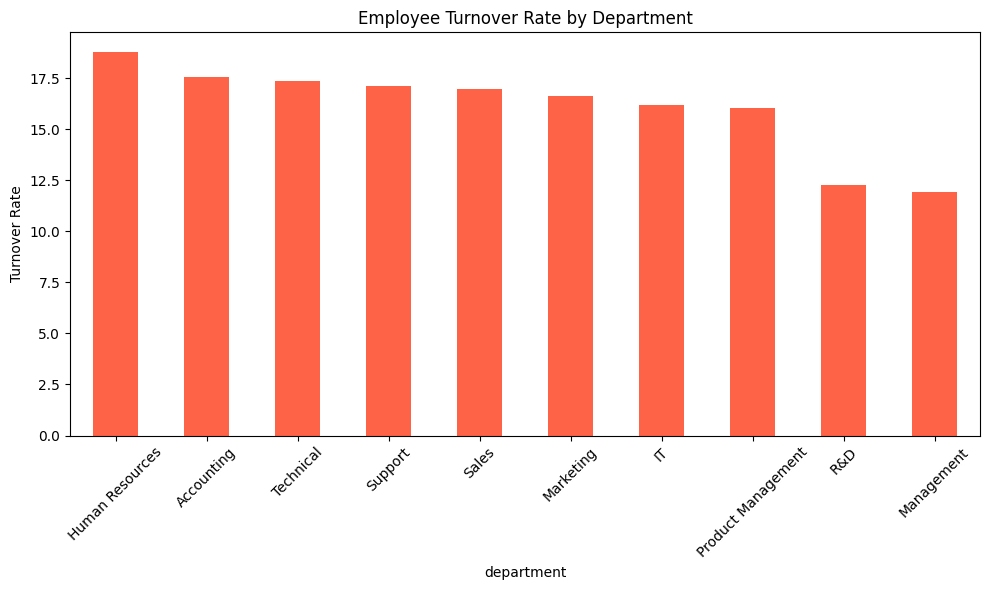

In [ ]:
# Group by department and calculate turnover rate
turnover_by_dept = (df1.groupby('department')['left'].mean().sort_values(ascending=False) * 100).round(2)
turnover_by_dept.plot(kind='bar', figsize=(10,6), color='tomato')
plt.ylabel('Turnover Rate')
plt.title('Employee Turnover Rate by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Although there are differences in turnover rates across departments, these variations are not significantly large, with the difference between the largest rate and the lowest approximately 5.5%. This suggests that the department an employee works in may not be a major factor influencing their decision to leave the company.

### Turnover by salary

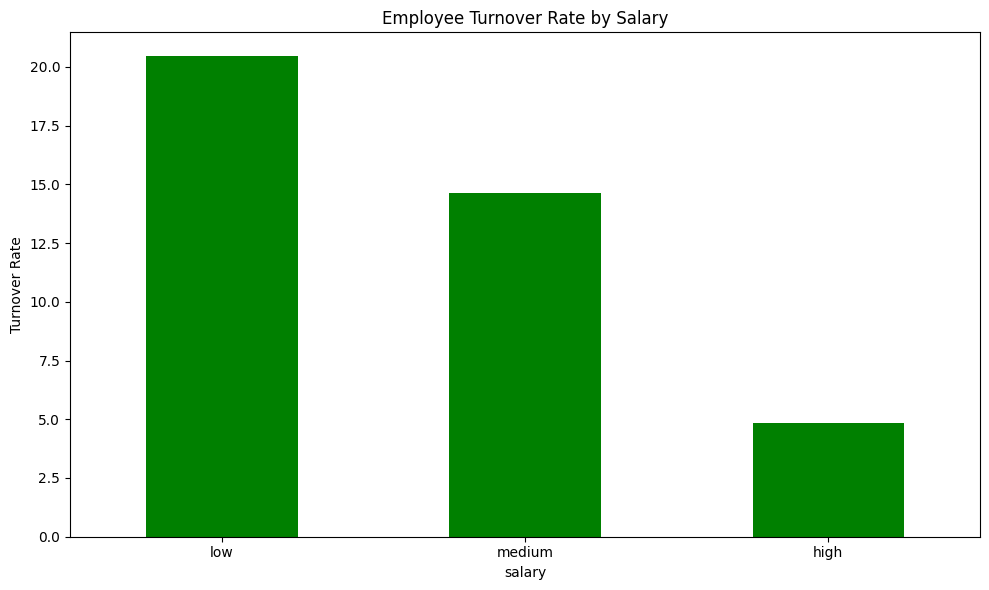

In [ ]:
# Group by salary and calculate turnover rate
turnover_by_dept = (df1.groupby('salary')['left'].mean().sort_values(ascending=False) * 100).round(2)
turnover_by_dept.plot(kind='bar', figsize=(10,6), color='green')
plt.ylabel('Turnover Rate')
plt.title('Employee Turnover Rate by Salary')
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

- It is evident that there is a significant difference in turnover rates across salary levels. The turnover rate for employees with low salaries is approximately 5% higher than that of those with medium salaries, and the gap between medium and high salary levels is roughly twice as large.
- While the data reveal a relationship between salary level and turnover rate, they do not necessarily imply that a low salary directly causes employees to leave.

#### Salary and workload

To navigate further, we may see if employees working more but being paid poorly led to their leave

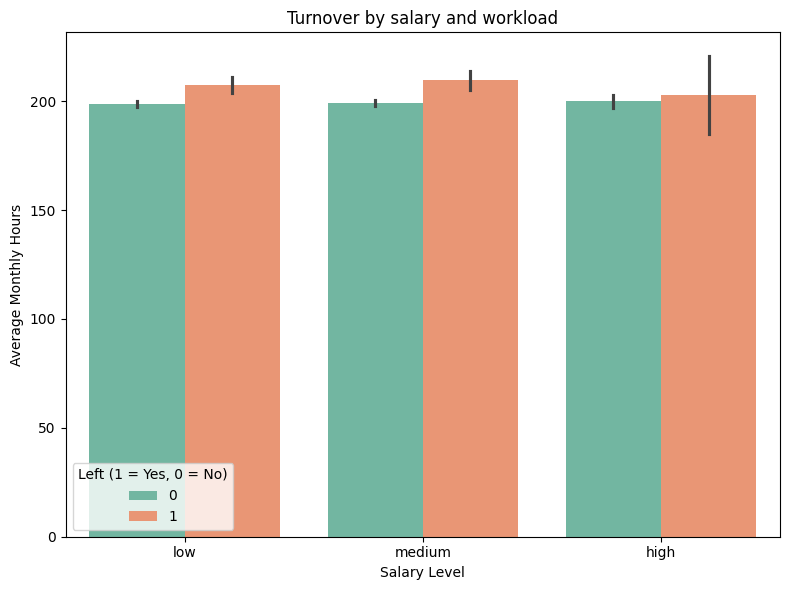

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df1, x='salary', y='average_monthly_hours', hue='left', palette='Set2')

plt.title('Turnover by salary and workload')
plt.ylabel('Average Monthly Hours')
plt.xlabel('Salary Level')
plt.legend(title='Left (1 = Yes, 0 = No)')
plt.tight_layout()
plt.show()

The bar chart indicates:
- Employees who left the company consistently worked more hours on average than those who stayed, across all salary levels. However, this difference is not significant
- Salary level alone does not significantly affect workload—employees tend to work similar hours regardless of salary.
- Even high-salary employees may leave if they are overworked, indicating possible burnout or dissatisfaction.

Since the combination of salary level and workload does not severely force employees to quit, this suggests a need to consider more about workload balance in retention strategies—not just compensation, though the salary did affect the chance of turnover.

#### Salary and tenure

Intuitively, employees who have been with a company longer are more likely to earn higher salaries. However, tenure alone does not guarantee better pay. If an employee has a long tenure but remains in a low salary bracket, this may contribute to their decision to leave. To explore this further, we will examine the relationship between tenure, salary level, and turnover.

In [ ]:
turnover_rate = (
    df1.groupby(['tenure', 'salary'])['left']
    .mean()
    .reset_index()
    .rename(columns={'left': 'turnover_rate'})
)

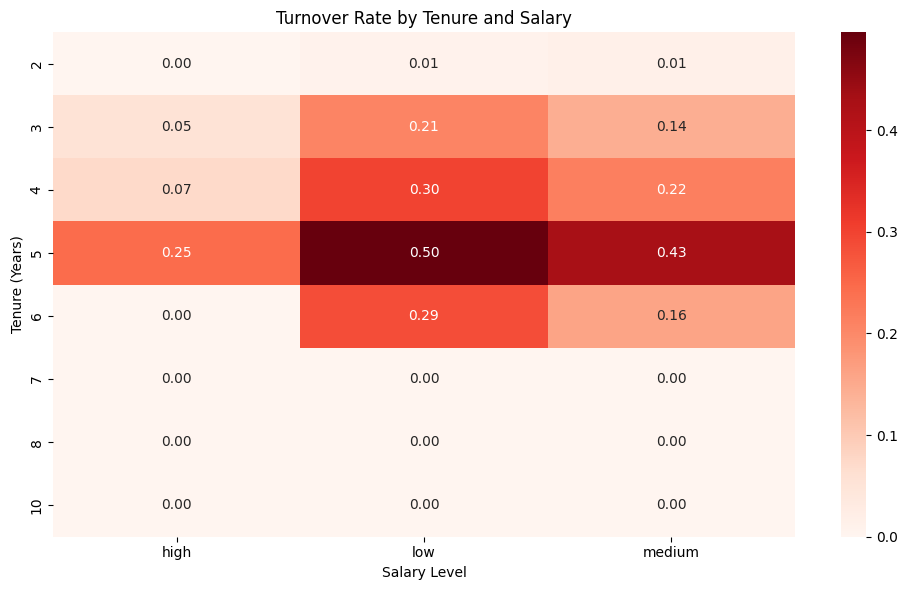

In [ ]:
pivot_table = turnover_rate.pivot(index='tenure', columns='salary', values='turnover_rate')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='.2f')
plt.title('Turnover Rate by Tenure and Salary')
plt.ylabel('Tenure (Years)')
plt.xlabel('Salary Level')
plt.tight_layout()
plt.show()

From the heatmap, we can see:
- Employees with mid-level experience (3–6 years) and low pay are the most likely to leave. Especially at the 5-year mark, low-paid and medium-paid employee turnover rate is high. This may be because they quit, or maybe because of underlying reasons
- Low salary with long tenure may signal disengagement or lack of career growth. However, it can also indicate that these employees, despite working for the company for a long time, do not deserve a better salary level. In other words, they may underperform, which led to their leave.

We will navigate the group of employee having the highest turnover rate concerning salary and tenure to explore the reason behind

In [ ]:
# Focus on one type of employee
df1_a = df1[(df1['tenure']==5) & (df1['salary']=='low')]

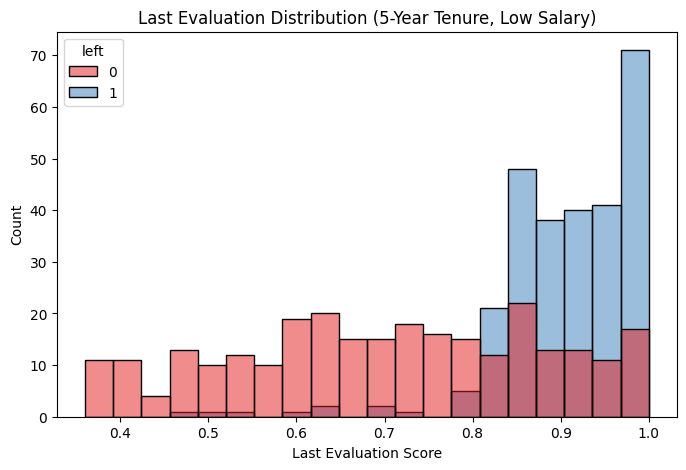

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df1_a, x='last_evaluation', hue='left', bins=20, palette='Set1')
plt.title('Last Evaluation Distribution (5-Year Tenure, Low Salary)')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Count')
plt.show()

From the chart, we can see a significant number of employees with high last evaluation scores still chose to leave the company. This suggests that high-performing employees with low pay in this section are more likely to resign, possibly due to dissatisfaction or lack of recognition.


In overall, the company should focus more on the 5-year tenure employee group, since the chance that an employee from this group being paid poorly leave the company is higher than other group. However, this may not be the whole story, since there were employees with mid-level salary still leave the company, may be due to more complex reasons

### Turnover by satisfaction and performance

#### Turnover by satisfaction level and evaluation score

We will see whether evaluation score and satisfaction level somehow affect the turnover rate

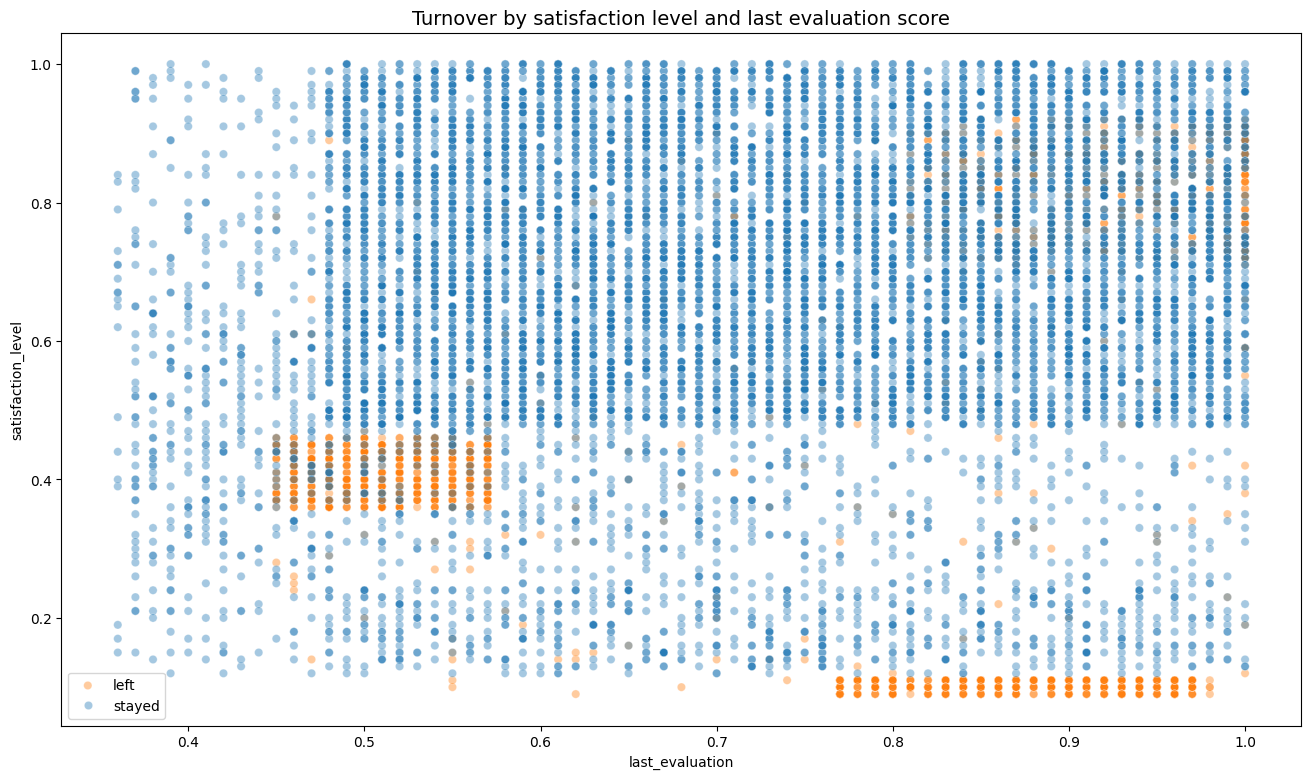

In [ ]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='last_evaluation', y='satisfaction_level',hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Turnover by satisfaction level and last evaluation score', fontsize='14')
plt.show()

From the scatter plot, we can identify two distinct groups of employees who tend to leave the company:

- The first group consists of employees with low satisfaction levels but high last evaluation scores. This suggests they were likely performing well in their roles but were dissatisfied—possibly due to factors such as salary, promotion opportunities, or workload. It is likely that many in this group voluntarily resigned.
- The second group includes employees with moderate satisfaction levels but low last evaluation scores. This pattern may indicate underperformance in recent periods, suggesting that these employees were more likely to have been terminated.

#### Turnover by satisfaction level and tenure

/tmp/ipython-input-99-3656740937.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=turnover_by_tenure, x='tenure', y='left', palette='viridis')


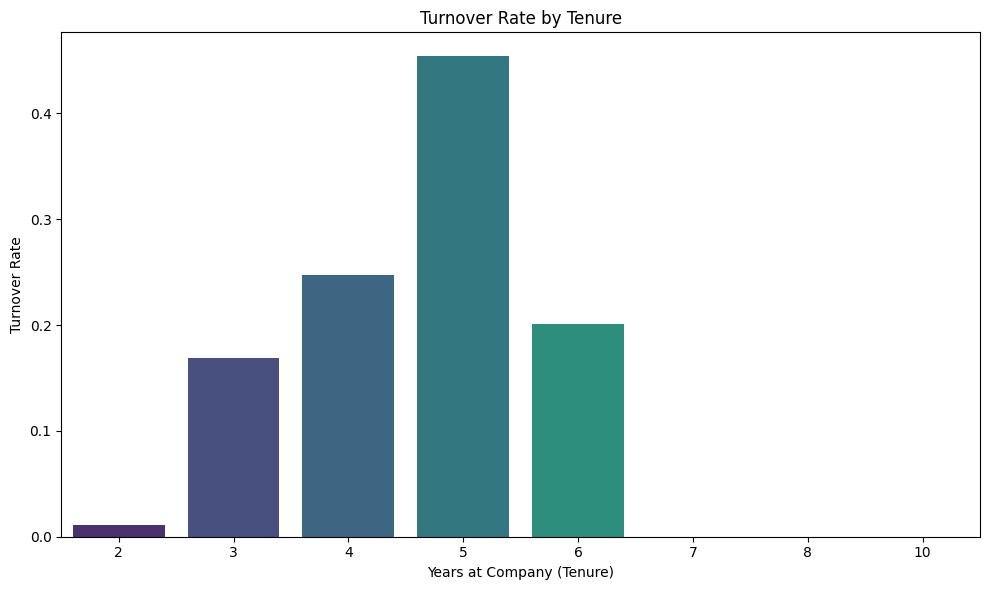

In [ ]:
# Group by tenure and calculate turnover rate
turnover_by_tenure = df.groupby('tenure')['left'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=turnover_by_tenure, x='tenure', y='left', palette='viridis')

plt.title('Turnover Rate by Tenure')
plt.xlabel('Years at Company (Tenure)')
plt.ylabel('Turnover Rate')
plt.tight_layout()
plt.show()

From the bar graph, it is evident that employees with 5 years of tenure exhibit the highest turnover rate, which aligns with our earlier findings.

We will navigate whether the satisfaction level and the tenure related to each other

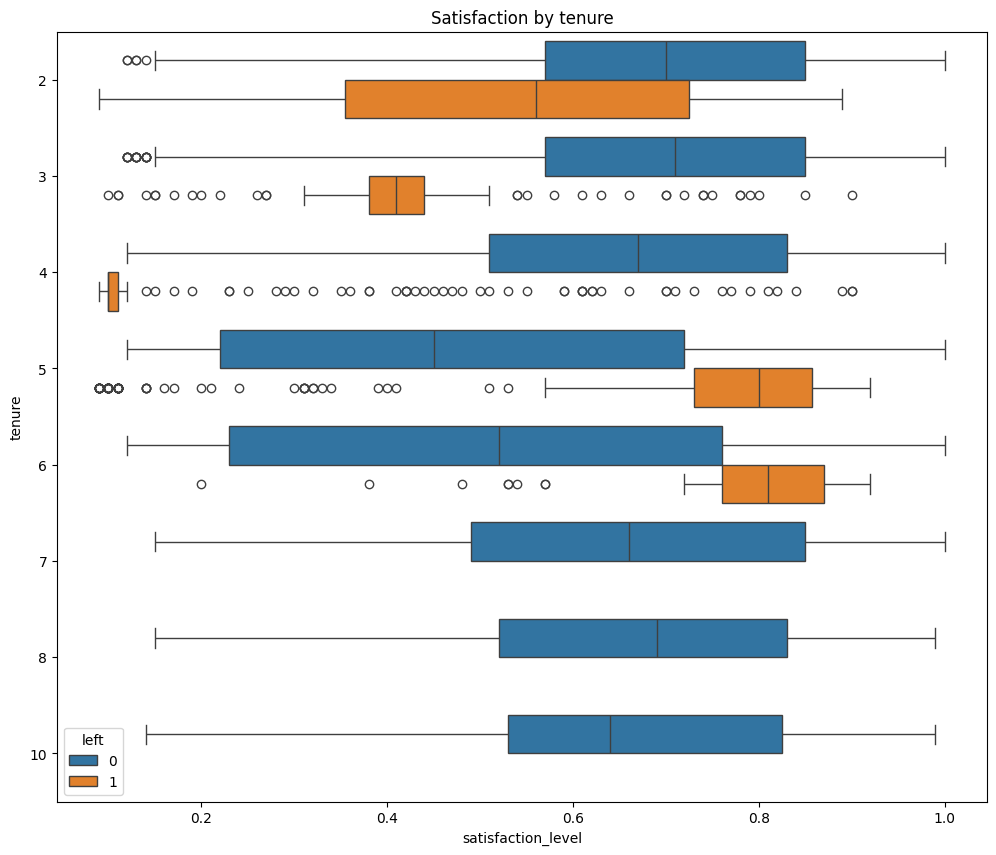

In [ ]:
 # Create boxplot showing distributions of `satisfaction_level` and tenure, comparing employees who stayed versus those who left
plt.figure(figsize = (12,10))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='horiz')
plt.title('Satisfaction by tenure', fontsize='12')
plt.show()

From the boxplot, we observe:

- Employees with more than 6 years of tenure consistently stayed with the company—none of them left.
- The turnover group primarily includes two segments:
  + Those with 5 to 6 years of experience and high satisfaction levels, suggesting possible disengagement despite strong satisfaction.
  + Those with 2 to 4 years of tenure and medium to low satisfaction, which may reflect early career dissatisfaction or lack of growth opportunities.
- Notably, a significant number of 4-year-experience employees exhibit very low satisfaction levels (below 0.2), highlighting a potential burnout, which has been noticed from the previous analysis.

#### Turnover by workload and tenure

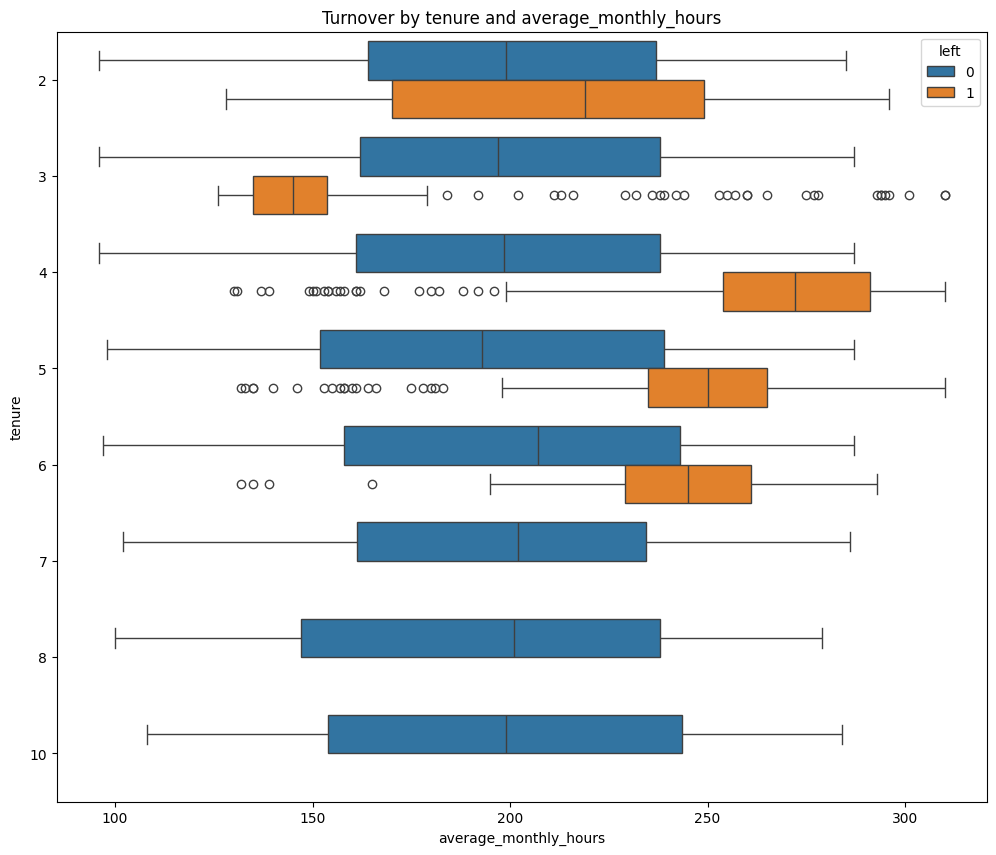

In [ ]:
# Create boxplot showing distributions of `tenure` and average_monthly_hours, comparing employees who stayed versus those who left
plt.figure(figsize = (12,10))
sns.boxplot(data=df1, x='average_monthly_hours', y='tenure', hue='left', orient='horiz')
plt.title('Turnover by tenure and average_monthly_hours', fontsize='12')
plt.show()

From the chart, we have some observations:
- Early Turnover (2 years): Employees who left after 2 years tended to have higher average monthly hours, suggesting overwork as a key reason for early departure.
- Mid-Tenure Turnover (3 years): Uniquely, employees who left at 3 years had lower average monthly hours than those who stayed, pointing to possible underperformance and likely involuntary exits (e.g., terminations).
- Mid-to-Long Tenure Turnover (4–6 years): Turnover during these years was again associated with high workloads, indicating that burnout or sustained pressure may have driven employees to leave despite their tenure.
- Long Tenure (7+ years): Aligning with earlier insights, employees with more than 6 years of tenure did not leave, suggesting these are loyal employees.

We will try to compare the average working hours of different group of employees based on tenure

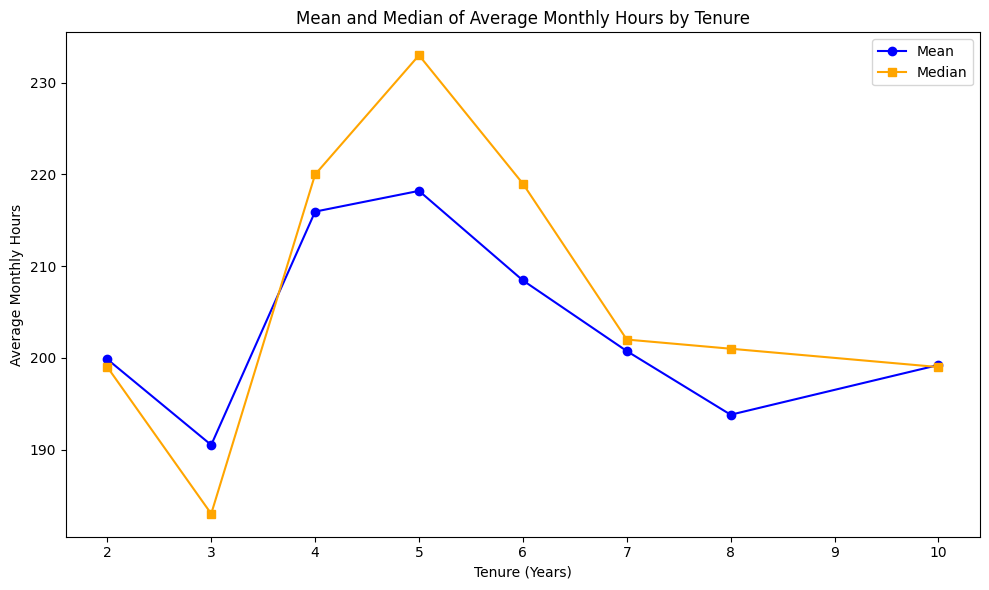

In [ ]:
agg_df = df1.groupby('tenure')['average_monthly_hours'].agg(['mean', 'median']).reset_index()
plt.figure(figsize=(10, 6))

# Plot mean
plt.plot(agg_df['tenure'], agg_df['mean'], marker='o', label='Mean', color='blue')

# Plot median
plt.plot(agg_df['tenure'], agg_df['median'], marker='s', label='Median', color='orange')

plt.title('Mean and Median of Average Monthly Hours by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Monthly Hours')
plt.legend()
plt.tight_layout()
plt.show()

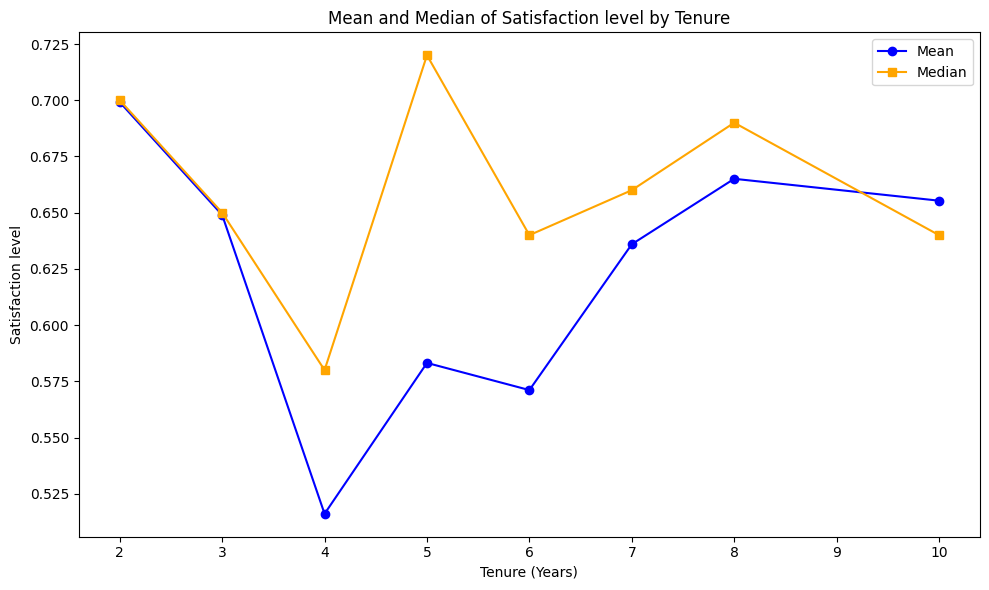

In [ ]:
agg_df = df1.groupby('tenure')['satisfaction_level'].agg(['mean', 'median']).reset_index()
plt.figure(figsize=(10, 6))

# Plot mean
plt.plot(agg_df['tenure'], agg_df['mean'], marker='o', label='Mean', color='blue')

# Plot median
plt.plot(agg_df['tenure'], agg_df['median'], marker='s', label='Median', color='orange')

plt.title('Mean and Median of Satisfaction level by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Satisfaction level')
plt.legend()
plt.tight_layout()
plt.show()

According to the average monthly hours worked, employees with 4 years of tenure experience a notable increase in workload compared to those with 3 years. This sharp rise in working hours may explain the abnormally low satisfaction levels observed in many 4-year employees. It’s possible that the unexpected workload surge led to exhaustion, and they may not have had enough time to adapt, contributing to dissatisfaction.

However, we cannot directly conclude that the sudden increase in workload causes the higher turnover rate, as the most notable rise in turnover occurs between employees with 4 and 5 years of experience. A non-quantitative hypothesis suggests that the decline in satisfaction due to increased workload may not lead to immediate resignation. Instead, employees might attempt to persevere for another year before leaving if working conditions remain unchanged. While this remains a speculative assumption, it raises a valid concern for stakeholders to investigate further, as the current dataset does not provide sufficient evidence to confirm this explanation.



#### Turnover by evaluation score and tenure

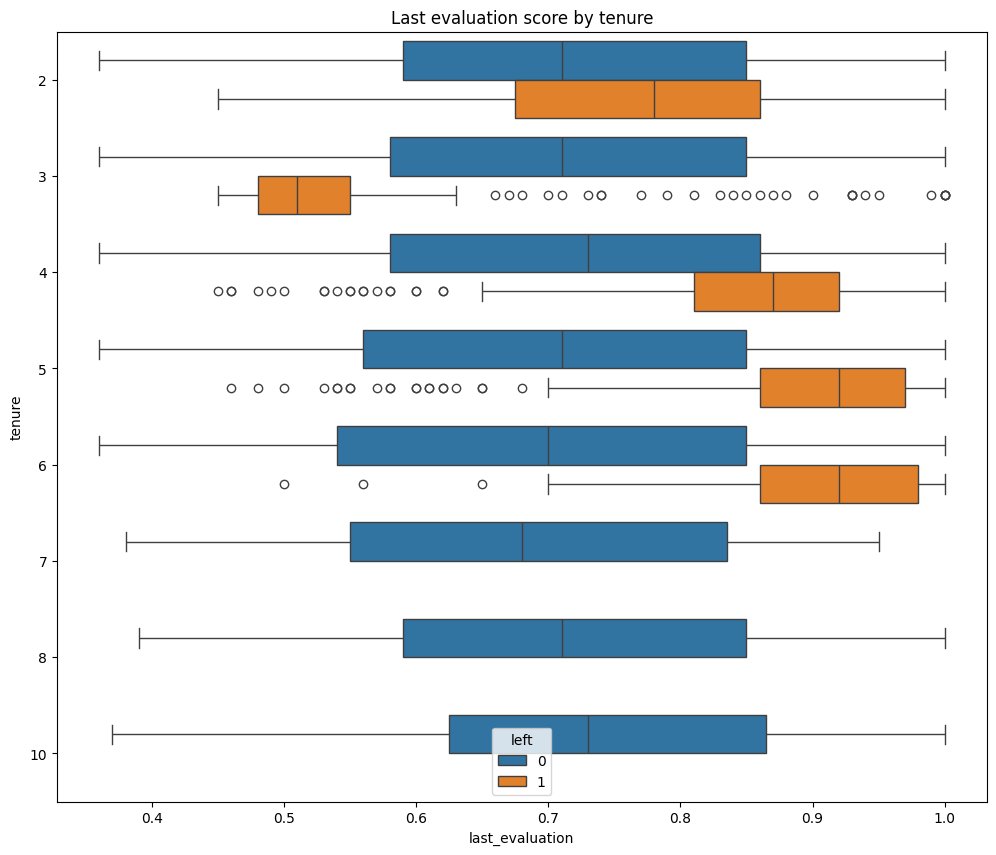

In [ ]:
 # Create boxplot showing distributions of `last_evaluation` and tenure, comparing employees who stayed versus those who left
plt.figure(figsize = (12,10))
sns.boxplot(data=df1, x='last_evaluation', y='tenure', hue='left', orient='horiz')
plt.title('Last evaluation score by tenure', fontsize='12')
plt.show()

From the chart, we can identify three major groups of employees who left the company:

- Low-tenure employees with medium to high evaluation scores – These individuals likely did not leave due to poor performance, suggesting other factors such as dissatisfaction, lack of opportunity, or external offers may have influenced their decision.

- Employees with around 3 years of experience and low evaluation scores – This group likely represents those who were let go due to underperformance.

- Employees with 4 to 6 years of tenure and high performance – Despite performing well, these employees still chose to leave, possibly due to heavy workload, lack of recognition, limited career progression, or other underlying issues.

### Turnover by workload

Both the average hours of working per month and the number of projects reflect the workload, so we will visualize it to see whether it is related to the turnover rate

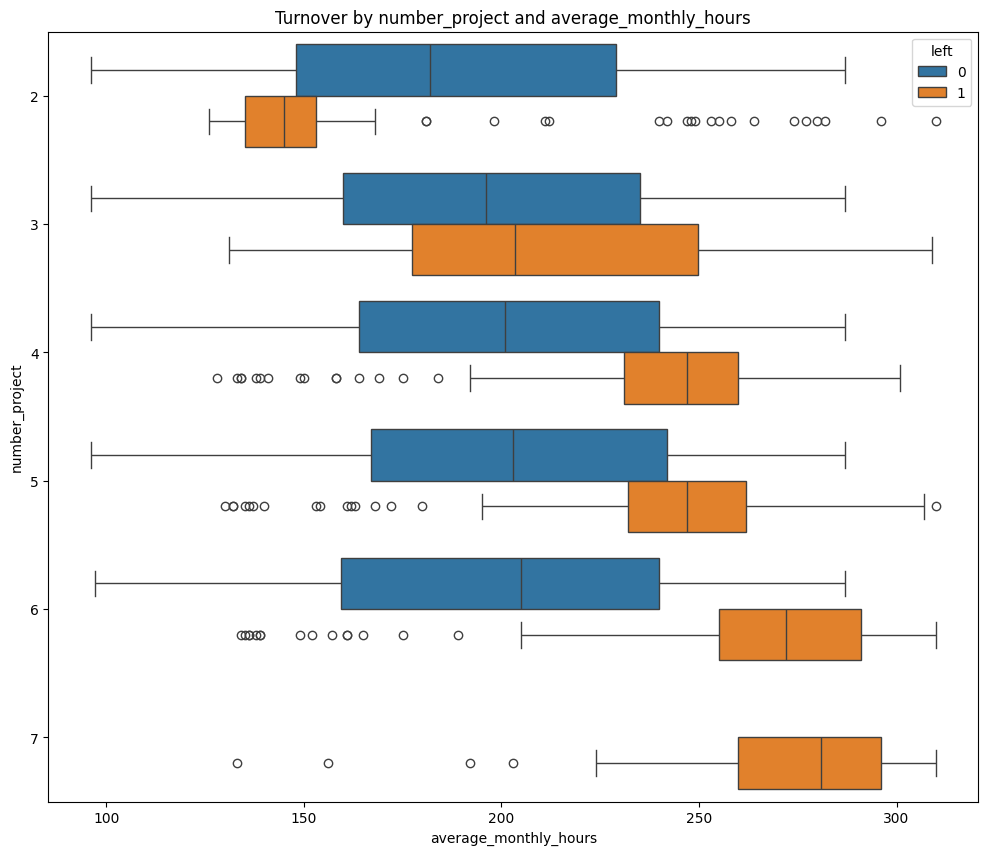

In [ ]:
# Create boxplot showing distributions of `number_project` and average_monthly_hours, comparing employees who stayed versus those who left
plt.figure(figsize = (12,10))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='horiz')
plt.title('Turnover by number_project and average_monthly_hours', fontsize='12')
plt.show()

From the boxplot, we can observe:
- Low Project Count (2 projects): Employees who left the company worked significantly fewer average monthly hours compared to those who stayed. This suggests that heavy workload might not be the reason for departure among employees with very few projects. A more likely assumption is that, employees in the left group of this section worked less than their peers, and therefore terminated.
- Moderate to High Project Count (3 to 6 projects): As the number of projects increases from 3 to 7, a clear and consistent pattern emerges: employees who left the company consistently worked more average monthly hours than those who stayed. Especially all the employees working in 7 projects left the company, very likely because of exhaustion.

This strong correlation between higher project counts, excessive average monthly hours suggests that overwork and burnout are significant factors contributing to employees leaving the company.

#### Turnover by satisfaction and workload

Heavy workload, intuitively will not result in high satisfaction level, so we will examine the relationship between them, along with employees who left and stayed

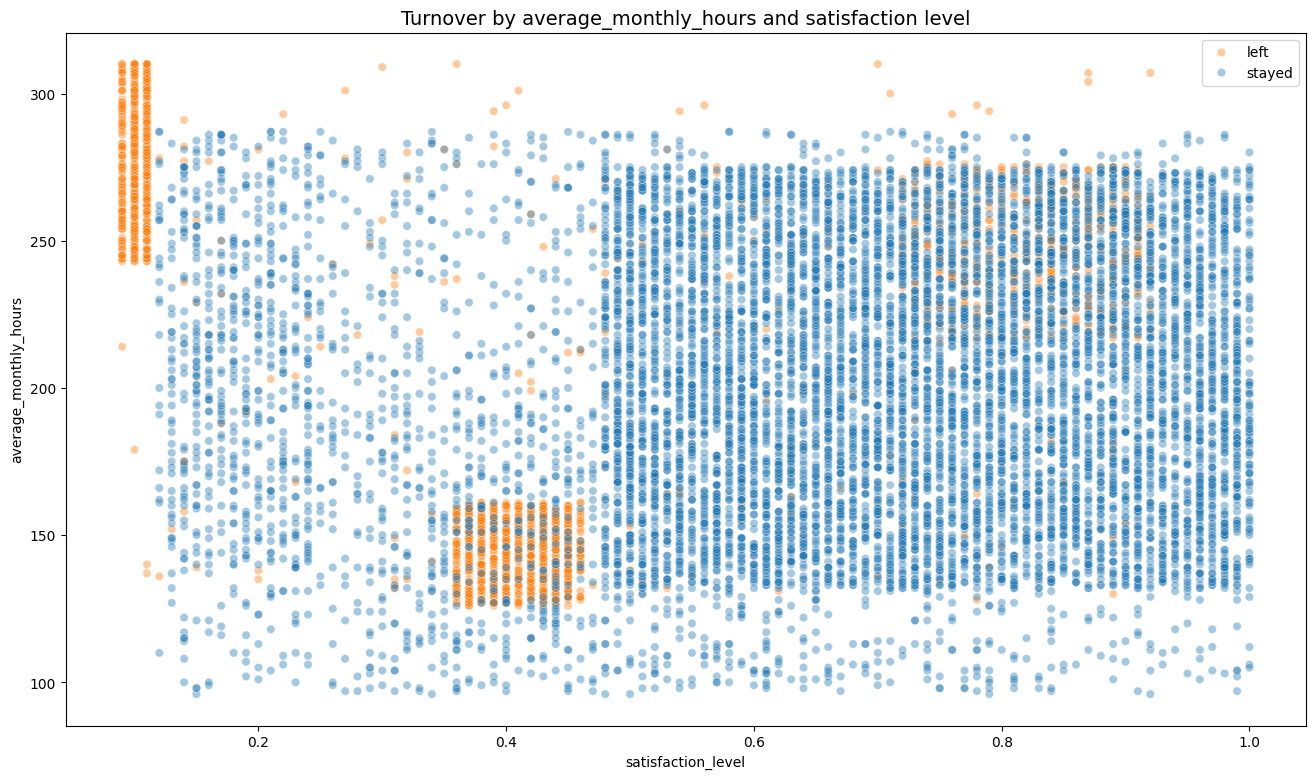

In [ ]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='satisfaction_level', y='average_monthly_hours',hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Turnover by average_monthly_hours and satisfaction level', fontsize='14')
plt.show()

- The scatterplot above shows that there was a sizeable group of employees who worked ~240–320 hours per month, which is over 60-80 hours per week. It’s likely this is the reason why their satisfaction levels being close to zero.

- The plot also shows another group of people who left that had less working hours than the previous group. Even so, their satisfaction was not high. The reason why this is the case is unclear, and may need further investigation to find out

- There is a group who worked ~210–280 hours per month, and they had satisfaction levels quite high. Yet they left, and the reason behind that still unexplainable.

So after all, the heavy workload is a significant factor in the turnover rate

#### Turnover by workload and promotion


We aim to examine whether employees under heavy workloads are more likely to stay with the company if they receive a promotion. In other words, does promotion offset the potential negative impact of overwork on employee retention?


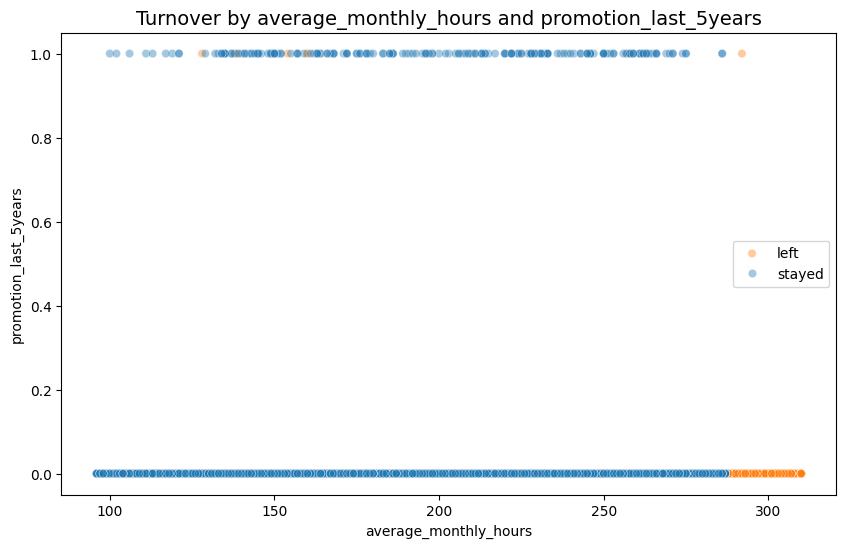

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years',hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Turnover by average_monthly_hours and promotion_last_5years', fontsize='14')
plt.show()

Observations from the Plot:
- Very few employees who were promoted in the last five years ended up leaving the company, suggesting that promotion is strongly associated with retention.
- Employees who worked the longest hours were rarely promoted, indicating a possible imbalance between effort and recognition.
- Among those who worked the most hours, all eventually left, reinforcing the idea that sustained overwork without reward may lead to turnover.



### Turnover by promotion

#### Turnover by tenure and promotion

Employees who have been with the company for a long time may choose to leave if they do not receive a promotion after five years. However, based on earlier observations, only those with less than seven years of tenure were leaving, and promotions are generally not expected before five years of service. Therefore, we will focus on employees with 5 and 6 years of experience to examine whether a lack of promotion impacts their satisfaction and contributes to their decision to leave.



In [ ]:
df1_b = df1[(df1['tenure'] == 6) | (df1['tenure'] == 5)]

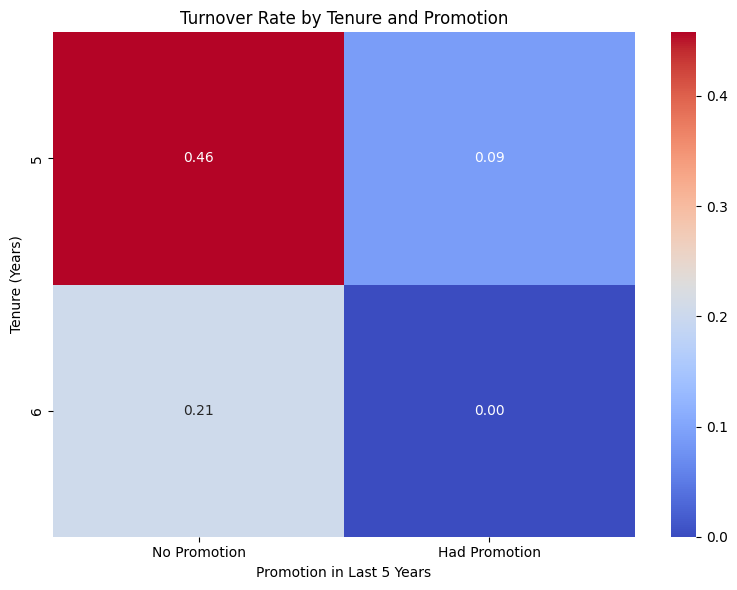

In [ ]:
# Compute turnover rate
heatmap_data = (
    df1_b.groupby(['tenure', 'promotion_last_5years'])['left']
    .mean()
    .unstack()
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Turnover Rate by Tenure and Promotion')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Tenure (Years)')
plt.xticks([0.5, 1.5], ['No Promotion', 'Had Promotion'])
plt.tight_layout()
plt.show()

We observe a remarkable pattern: among employees who had been with the company for 6 years, none of those who were promoted left. In contrast, the turnover rate is notably high for employees with 5 years of tenure who did not receive a promotion. While this does not imply that the lack of promotion directly causes turnover, it does suggest a potential relationship between these variables that may warrant further investigation.



#### Turnover by evaluation score and promotion

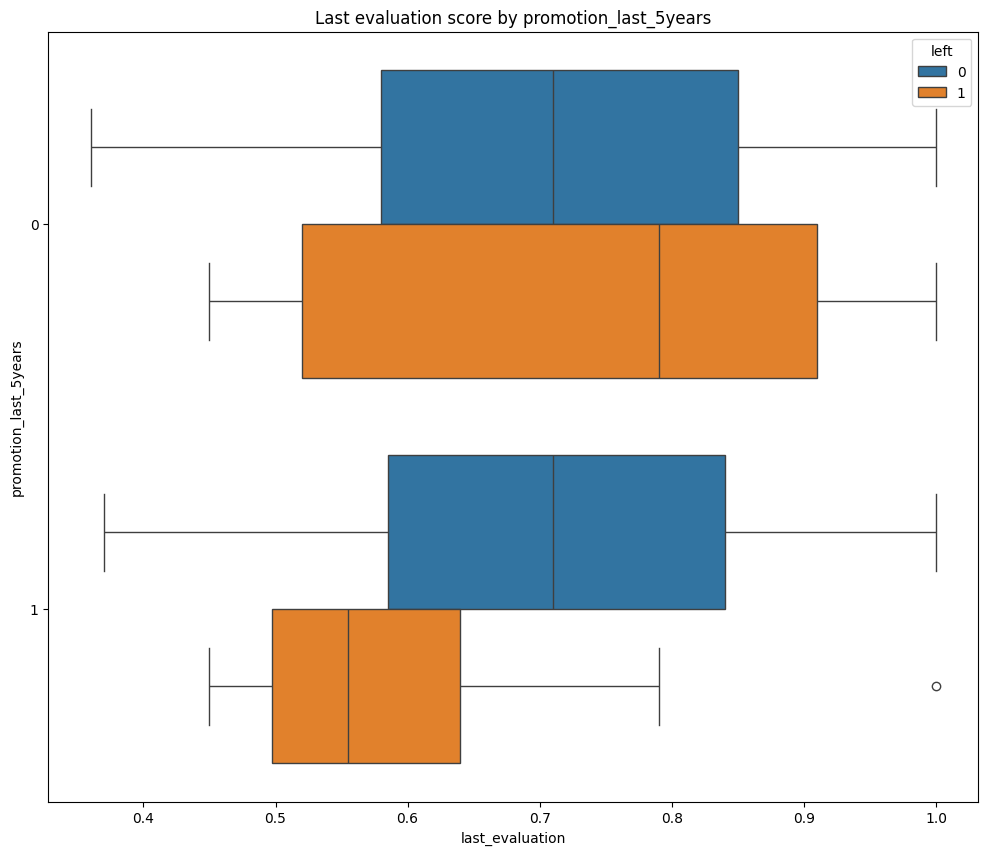

In [ ]:
 # Create boxplot showing distributions of `last_evaluation` and promotion_last_5years, comparing employees who stayed versus those who left
plt.figure(figsize = (12,10))
sns.boxplot(data=df1, x='last_evaluation', y='promotion_last_5years', hue='left', orient='horiz')
plt.title('Last evaluation score by promotion_last_5years', fontsize='12')
plt.show()

From the chart, we can navigate into 2 parts of employee:
- Employees without promotion (promotion_last_5years = 0):
  + Many high-performing employees (with high evaluation scores) still left the company.

  + Suggests that lack of promotion despite good performance may contribute to employee dissatisfaction and turnover.

- Employees with promotion (promotion_last_5years = 1):
  + Those who stayed had relatively high and consistent evaluation scores.

Promotion appears to be one of the retention factors, especially for high-performing employees. On the other hand, high performers without promotion are more likely to leave, indicating a potential issue with recognition or career progression.

#### Turnover by evaluation score and promotion among 5-year-experience employee

From previous EDA, we know that employees with 5 years of tenure likely to leave the company. Now, we will examine further into their performance and promotion, to see if a lack of recognition affects their decision.

In [15]:
df1_c = df1[df1['tenure'] == 5]
df1_c.head()

satisfaction_level  last_evaluation  number_project  \
3                 0.72             0.87               5   
7                 0.92             0.85               5   
8                 0.89             1.00               5   
12                0.84             0.92               4   
19                0.76             0.89               5   

    average_monthly_hours  tenure  work_accident  left  promotion_last_5years  \
3                     223       5              0     1                      0   
7                     259       5              0     1                      0   
8                     224       5              0     1                      0   
12                    234       5              0     1                      0   
19                    262       5              0     1                      0   

   department salary  
3       Sales    low  
7       Sales    low  
8       Sales    low  
12      Sales    low  
19      Sales    low

In [30]:
df1_c[df1_c['left'] == 1].groupby('promotion_last_5years')['last_evaluation'].agg(['count','min','median'])

count   min  median
promotion_last_5years                     
0                        481  0.46    0.92
1                          1  1.00    1.00

Nearly all employees with 5 years of tenure who left the company (481 out of 482) had not received a promotion, despite having high evaluation scores.
This strongly suggests that lack of career advancement—despite strong performance—is a critical factor driving mid-tenure turnover.

### Turnover by promotion and accident

In [ ]:
from scipy.stats import chi2_contingency

# Crosstab between work_accident and left
contingency_table = pd.crosstab(df1['work_accident'], df1['left'])

# Chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

if p < 0.05:
    print("Conclusion: There is a relationship between work_accident and turnover (reject H0)")
else:
    print("Conclusion: There is not enough evidence to say that work_accident affects turnover (fail to reject H0)")


Chi-squared: 187.7378344525747
p-value: 9.911242628423175e-43
Degrees of freedom: 1
Conclusion: There is a relationship between work_accident and turnover (reject H0)


In [ ]:
# Crosstab between promotion_last_5years and left
contingency_table = pd.crosstab(df1['promotion_last_5years'], df1['left'])

# Chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

if p < 0.05:
    print("Conclusion: There is a relationship between promotion_last_5years and turnover (reject H0)")
else:
    print("Conclusion: There is not enough evidence to say that promotion_last_5years affects turnover (fail to reject H0)")


Chi-squared: 22.992127549276592
p-value: 1.6266615348676462e-06
Degrees of freedom: 1
Conclusion: There is a relationship between promotion_last_5years and turnover (reject H0)


From two Chi-squared test of independence, we can say that there is a relationship between accident, promotion and turnover rate.

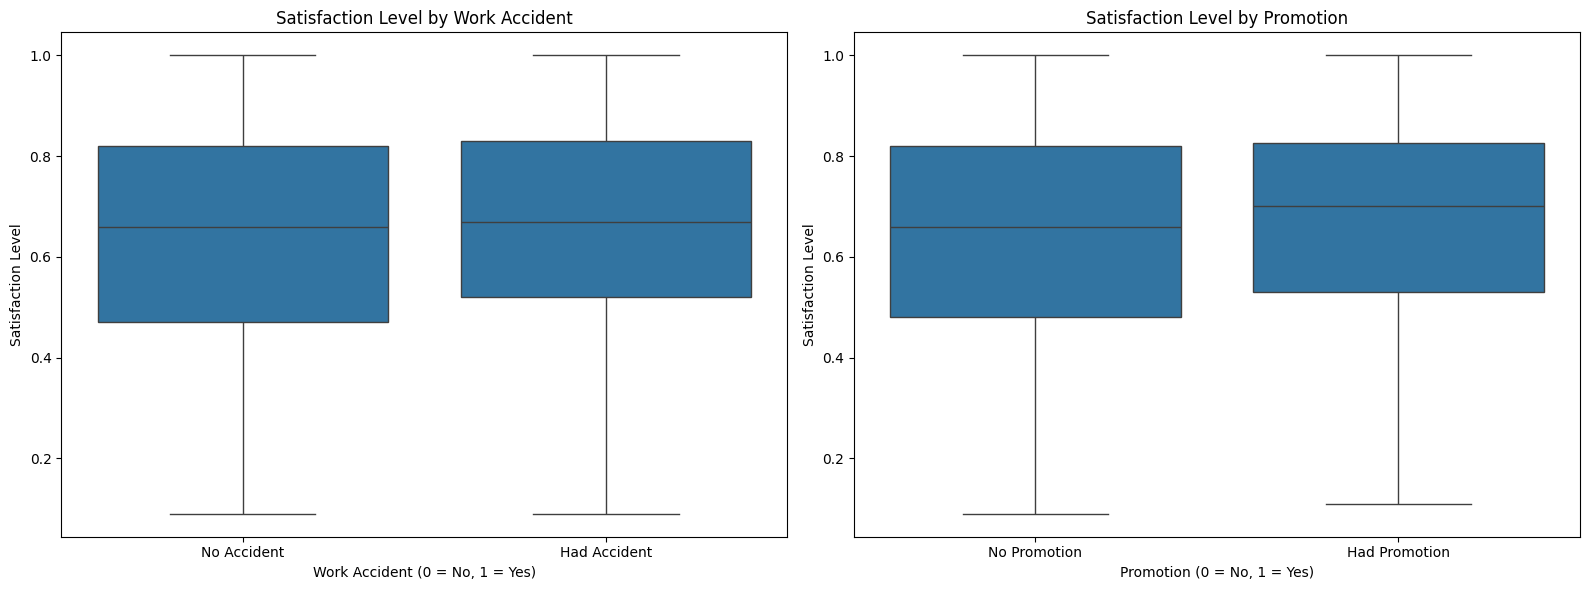

In [ ]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First boxplot: Work Accident vs Satisfaction Level
sns.boxplot(data=df1, x='work_accident', y='satisfaction_level', ax=axes[0])
axes[0].set_title('Satisfaction Level by Work Accident')
axes[0].set_xlabel('Work Accident (0 = No, 1 = Yes)')
axes[0].set_ylabel('Satisfaction Level')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Accident', 'Had Accident'])

# Second boxplot: Promotion vs Satisfaction Level
sns.boxplot(data=df1, x='promotion_last_5years', y='satisfaction_level', ax=axes[1])
axes[1].set_title('Satisfaction Level by Promotion')
axes[1].set_xlabel('Promotion (0 = No, 1 = Yes)')
axes[1].set_ylabel('Satisfaction Level')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Promotion', 'Had Promotion'])

plt.tight_layout()
plt.show()

From this visualization alone, experiencing a work accident or promotion does not appear to significantly affect employee satisfaction. However, from the hypothesis test we know that there is a relation between accident/promotion and turnover.

### Correlation heatmap

We will generate a heatmap to see which variables are highly correlated

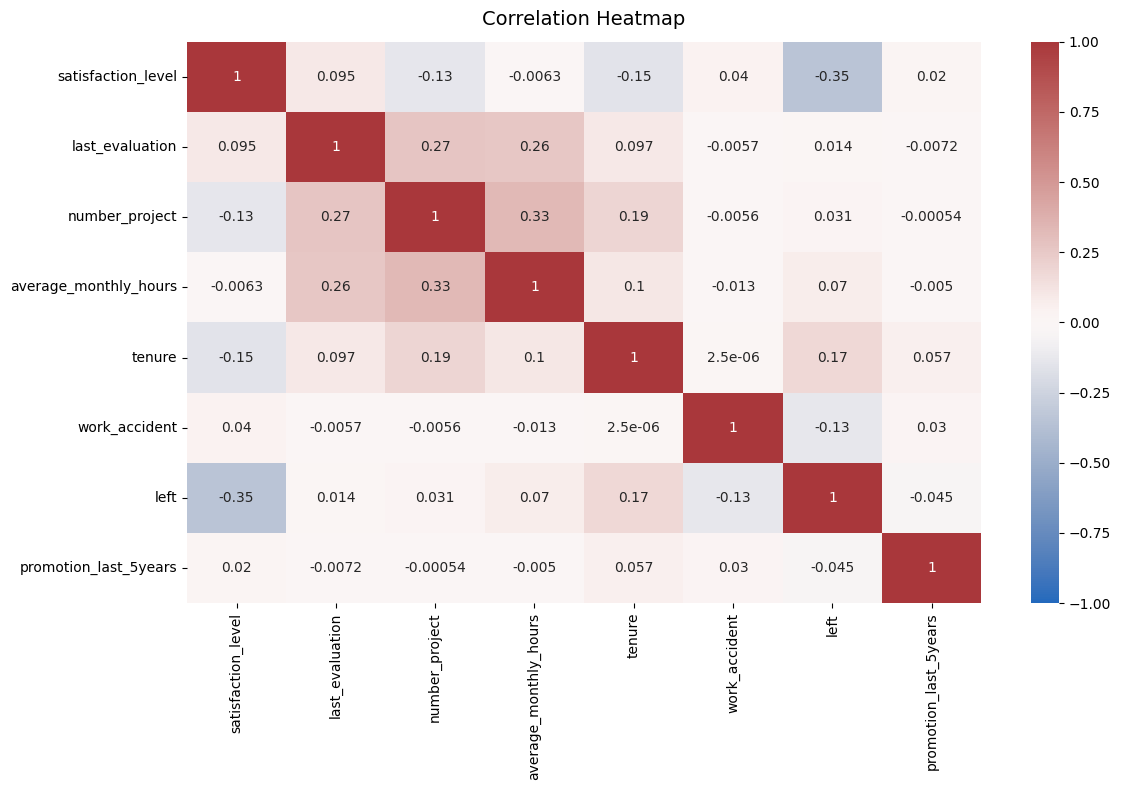

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.select_dtypes('number').corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Heatmap', fontsize=14, pad=12)
plt.tight_layout()
plt.show()

**Correlation Heatmap Summary**:
- Satisfaction level has the strongest negative correlation with employee turnover (left = -0.35), indicating that lower satisfaction is a key driver of employees leaving.
- Other variables show only weak correlations with turnover
- High workload (average_monthly_hours) is moderately correlated with:
  + Number of projects (+0.33)
  + Last evaluation (+0.26)

→ Employees with more projects or better evaluations tend to work longer hours.

- Last evaluation and number of projects also have a moderate positive correlation (+0.27), suggesting that higher-performing employees tend to be assigned more projects, or that handling more projects contributes to better evaluations.
- There are no strong correlations among most other variables, meaning multicollinearity is not a major concern.



## ***SUMMARY ON TURNOVER ANALYSIS***


### **Important features need to be concerned**
1.	**Salary**
  - Higher salary can support retention, but it is not sufficient on its own—especially when employees face excessive workload, which can still lead to turnover.

2.	**Workload & Burnout**
  - More projects and longer working hours increases the risk of leaving — highlighting workload management as critical.
  - Unbalanced workload is a consistent turnover driver.
  - Employees with high performance generally be assigned with more project and more workload, which can be problematic

3.	**Satisfaction vs. Performance**
  - High-performing but dissatisfied employees are likely to leave — pointing to issues like lack of recognition or growth.
  - Satisfaction level has the strongest correlation with turnover.
  - Poor performance along with low working hours, less projects can lead to the termination of an employee

4. **Promotion**
  - Lack of promotion despite strong performance or longer working hours leads to turnover.
  - Promotions aligned with performance are key for retention.

5. **Tenure**
  - Tenure alone is not a direct predictor of turnover, but when considered alongside factors like promotion, satisfaction, and workload, it becomes a valuable indicator for shaping retention strategies.
  -	Turnover risk increases during years 1–5 of experience, peaking around year 5, then drops significantly




### **Significant groups**

1. **High-risk groups**
  
  -	Employees with 5-year tenure, especially those low or medium-paid or with high evaluation scores but no promotion, suggesting unmet career expectations.

  - Employees with 4-year tenure, since they have the lowest satisfaction level

  - Employee with 3-year tenure, with low number of working hours and projects are likely to be terminated

  - Employee who performed well (high evaluation score) or overworking but dissatisfied or lack of promotion, suggest lack of recognition

2. **Low-risk groups**
  - Employee with at least 7 years of tenure

  - Employees with 6-year tenure and was promoted



### **Hypothesis**
Employees with 4 years of tenure experience a notable increase in workload compared to those with 3 years. This sharp rise in working hours may explain the abnormally low satisfaction levels observed in many 4-year employees.

The decline in satisfaction correlated with increased workload may not lead to immediate resignation. Instead, employees might attempt to persevere for another year before leaving if working conditions remain unchanged. While this remains a speculative assumption, it raises a valid concern for stakeholders to investigate further.

### **Key problems**
1. Imbalance Between Performance and Recognition
  
  - High-performing employees (high evaluation, many projects, long hours) still leave—especially without promotion.
  
  - Lack of career advancement or recognition appears to be a major driver of dissatisfaction and turnover.

2. Excessive and Poorly Managed Workload

  - Increased workload correlates with low satisfaction and resignation.

  - Employees who take on more work without reward are more likely to leave.



# **PREDICTION MODEL**

 The objective is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification.

 More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn’t leave)

Since the variable we want to predict (whether an employee leaves the company) is categorical, our options are Logistic Regression model, or a Tree-based Machine Learning model. We will implement some of them to compare and evaluate

## LOGISTIC REGRESSION MODEL

In [ ]:
df1.shape

(11991, 10)

### When using a Logistic Regression model, we should take into account its assumptions:
- Outcome variable is categorical: this assumption is met.
- Observations are independent of each other: Independent observation depends on the data sampling process, which we are not provided with the details, so let’s suppose that this assumption is met.
- No severe multicollinearity among X variables: According to the previous correlation matrix, this assumption is met.
- No extreme outliers: only the `tenure` column has outliers, so we need to alter this column.
- Linear relationship between each X variable and the logit of the outcome variable: since most columns of the data contains categorical or discrete values, we just need to check the `last_evaluation` and `satisfaction_level` columns.
- Sufficiently large sample size: the data size is (11991,10) so this assumption is met

### Data preparation for the model

First, we will encode categorical data for modeling

In [ ]:
# Copy the dataframe
df_lr = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_lr['salary'] = (
    df_lr['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Get dummies for the `department` column
df_lr = pd.get_dummies(df_lr, drop_first=True)

# Display the new dataframe
df_lr.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       0   
1       6              0     1                      0       1   
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   

   department_Human Resources  department_IT  department_Management  \
0                       False          False                  False   
1                       False          False                  False   
2                       False          False                  False   
3                       False          False                  False   
4                       False          False                  False   

   department_Marketing  department_Product Management  department_R&D  \
0                 False                          False           False   
1                 False                          False           False   
2                 False                          False           False   
3                 False                          False           False   
4                 False                          False           False   

   department_Sales  department_Support  department_Technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In the next step, we will remove outliers—particularly because logistic regression is sensitive to extreme values—and encode the categorical variables (`salary` and `department`). We will retain all variables in the model, as our earlier exploratory data analysis suggests that each feature may have some influence on the left outcome, even if that influence appears to be minor or statistically insignificant.



<Axes: xlabel='tenure'>

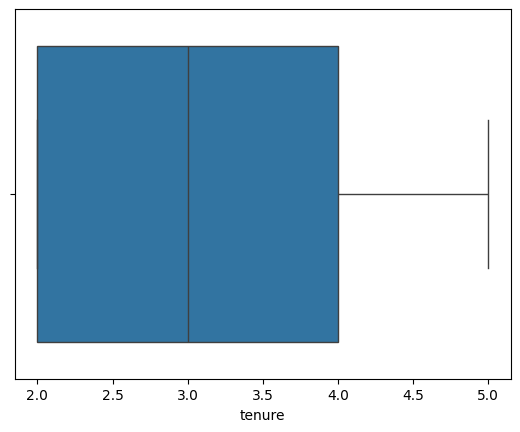

In [ ]:
# Indentify outliers
q1 = df_lr['tenure'].quantile(0.25)
q3 = df_lr['tenure'].quantile(0.75)
iqr = q3 - q1
upper_lim = q3 + 1.5*iqr
lower_lim = q1 - 1.5*iqr

# Create new dataset
df_lr = df_lr[(df_lr['tenure'] >= lower_lim ) & (df_lr['tenure'] <= upper_lim)]

# Boxlot to see the change
sns.boxplot(x=df_lr['tenure'])

In [ ]:
# Separate the X and y
y = df_lr['left']
X = df_lr.drop('left', axis=1)
print(y.head())
print(X.head())

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  \
0       3              0                      0       0   
2       4              0                      0       1   
3       5              0                      0       0   
4       3              0                      0       0   
5       3              0                      0       0   

   department_Human Resources  department_IT  department_Management  \
0                       Fal

In [ ]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'department_Human Resources',
       'department_IT', 'department_Management', 'department_Marketing',
       'department_Product Management', 'department_R&D', 'department_Sales',
       'department_Support', 'department_Technical'],
      dtype='object')

In [ ]:
X.dtypes

satisfaction_level               float64
last_evaluation                  float64
number_project                     int64
average_monthly_hours              int64
tenure                             int64
work_accident                      int64
promotion_last_5years              int64
salary                              int8
department_Human Resources          bool
department_IT                       bool
department_Management               bool
department_Marketing                bool
department_Product Management       bool
department_R&D                      bool
department_Sales                    bool
department_Support                  bool
department_Technical                bool
dtype: object

In [ ]:
y.dtype

dtype('int64')

### Modeling and evaluation

In [ ]:
# Split the data into training set, validation set and testing set
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=42)

# Print the size
print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")


Train: 6699 | Val: 2234 | Test: 2234


In [ ]:
lr_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train,y_train)

In [ ]:
# Use the logistic regression model to get predictions on the validation set
y_pred = lr_clf.predict(X_val)

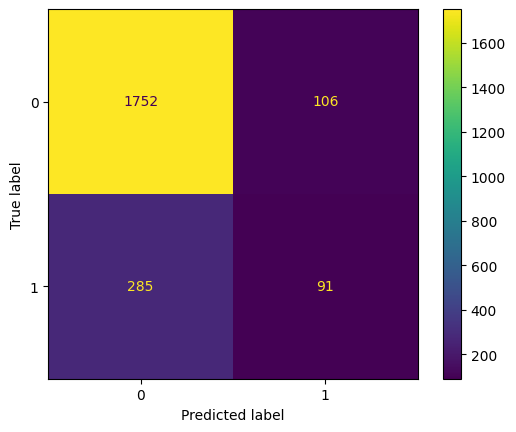

In [ ]:
# Compute values for confusion matrix
lr_cm = confusion_matrix(y_val, y_pred, labels=lr_clf.classes_)

# Create display of confusion matrix
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr_clf.classes_)

# Plot confusion matrix
lr_disp.plot(values_format='.0f')

# Display plot
plt.show()

Confusion matrix observations:
- The upper-left quadrant displays the number of true negatives, the number of people who did not leave that the model accurately predicted did.
- The bottom-left quadrant displays the number of false negatives, the number of people who left that the model inaccurately predicted did not leave.
- The upper-right quadrant displays the number of false positives, the number of people who did not leave the model inaccurately predicted as leaving
- The bottom-right quadrant displays the number of true positives, the number of people who left the model accurately predicted as leaving.

Judging from the confusion matrix, the model performs well at predicting non-leavers — the number of true negatives significantly exceeds the number of false negatives. However, it performs not very well at identifying actual leavers, as the number of true positives is slightly lower than the false positives.

To assess the model's performance more precisely, we will examine standard classification metrics such as Accuracy, Precision, Recall, and F1-score. However, it is important to note that based on our earlier EDA, the target variable is imbalanced. This means accuracy alone may not be a reliable indicator of model performance, particularly for the minority class (employees who leave).


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1858
           1       0.46      0.24      0.32       376

    accuracy                           0.82      2234
   macro avg       0.66      0.59      0.61      2234
weighted avg       0.79      0.82      0.80      2234



From the classification report above, it is clear that the model performs well in predicting employees who stay. Most evaluation metrics for this majority class — such as precision, recall, and F1-score — are relatively high (0.86-0.94).

However, when it comes to predicting employees who leave, the performance drops noticeably, with lower precision, recall and F1-score (0.24-0.46), especially the recall score only one-third of its counterpart, indicating that the model misses a significant portion of actual leavers.

While the overall accuracy score appears high, this can be misleading due to the class imbalance — accuracy is inflated by the model's ability to correctly predict the majority class.

To solve this, we will try to balance the class using `class_weight`

In [ ]:
lr_clf_balanced = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced').fit(X_train,y_train)

In [ ]:
y_pred_balanced = lr_clf_balanced.predict(X_val)
print(classification_report(y_val, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1858
           1       0.50      0.93      0.65       376

    accuracy                           0.83      2234
   macro avg       0.74      0.87      0.77      2234
weighted avg       0.90      0.83      0.85      2234



After applying class balancing, we observe a clear improvement in most performance metrics—with the exception of recall for the negative class (employees who stayed), which slightly declined. Notably, the recall for the positive class (employees who left) increased by nearly four times. This indicates a significant reduction in the model's tendency to miss actual leavers, which was a major limitation in the original model.

While this improvement comes at the cost of more false predict that an employee will leave when they actually stay—it is a reasonable trade-off if the goal is to prioritize identifying potential turnover risks.

### Linearity Assumption

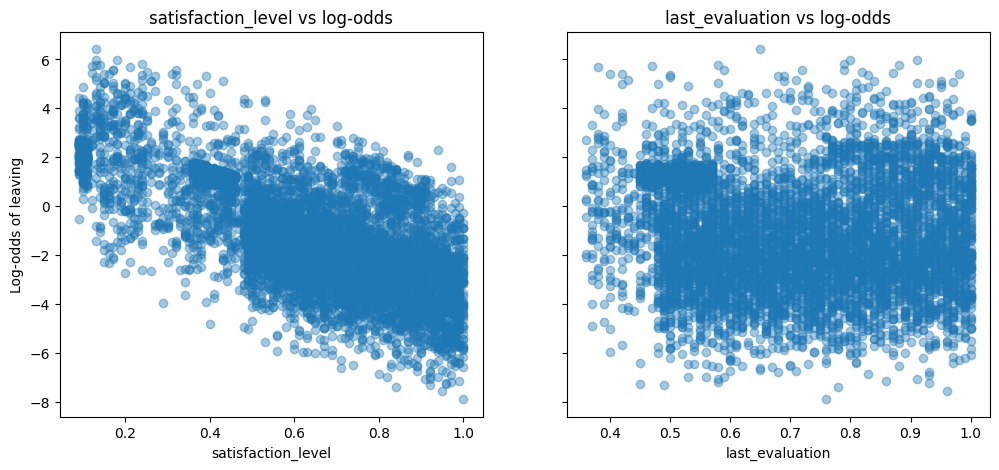

In [ ]:
p = lr_clf_balanced.predict_proba(X_train)[:, 1]  # Probability of 'left' = 1

# Compute log-odds (logit)
logit = np.log(p / (1 - p))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for satisfaction_level
axes[0].scatter(X_train['satisfaction_level'], logit, alpha=0.4)
axes[0].set_title('satisfaction_level vs log-odds')
axes[0].set_xlabel('satisfaction_level')
axes[0].set_ylabel('Log-odds of leaving')

# Plot for last_evaluation
axes[1].scatter(X_train['last_evaluation'], logit, alpha=0.4)
axes[1].set_title('last_evaluation vs log-odds')
axes[1].set_xlabel('last_evaluation')

plt.show()

From the scatterplots, we observe that while there appears to be some linear relationship between `satisfaction_level` and the log-odds of `left`, this linearity does not hold for `last_evaluation`. Although we could apply transformations to improve linearity, doing so may introduce complexity or distort interpretability.

Instead, we will explore alternative models that do not rely on the linearity assumption and are better equipped to handle non-linear relationships. This approach may provide more accurate predictions without requiring extensive feature engineering.

## TREE-BASED MODEL

We will examine the Random Forest and Decision Tree algorithms and compare the results

### Data preparation for the model

First, we will encode categorical data for modeling

In [31]:
# Copy the dataframe
df_tree = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_tree['salary'] = (
    df_tree['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Get dummies for the `department` column
df_tree = pd.get_dummies(df_tree, drop_first=False)

# Display the new dataframe
df_tree.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       0   
1       6              0     1                      0       1   
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   

   department_Accounting  department_Human Resources  department_IT  \
0                  False                       False          False   
1                  False                       False          False   
2                  False                       False          False   
3                  False                       False          False   
4                  False                       False          False   

   department_Management  department_Marketing  department_Product Management  \
0                  False                 False                          False   
1                  False                 False                          False   
2                  False                 False                          False   
3                  False                 False                          False   
4                  False                 False                          False   

   department_R&D  department_Sales  department_Support  department_Technical  
0           False              True               False                 False  
1           False              True               False                 False  
2           False              True               False                 False  
3           False              True               False                 False  
4           False              True               False                 False

Since tree-based models can perform well even with outliers, we will choose not to handle them

In [32]:
df_tree['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [33]:
# Separate the X and y
y = df_tree['left']
X = df_tree.drop('left', axis=1)
print(y.head())
print(X.head())

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  \
0       3              0                      0       0   
1       6              0                      0       1   
2       4              0                      0       1   
3       5              0                      0       0   
4       3              0                      0       0   

   department_Accounting  department_Human Resources  department_IT  \
0                  False   

In [ ]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'department_Accounting',
       'department_Human Resources', 'department_IT', 'department_Management',
       'department_Marketing', 'department_Product Management',
       'department_R&D', 'department_Sales', 'department_Support',
       'department_Technical'],
      dtype='object')

In [ ]:
X.dtypes

satisfaction_level               float64
last_evaluation                  float64
number_project                     int64
average_monthly_hours              int64
tenure                             int64
work_accident                      int64
promotion_last_5years              int64
salary                              int8
department_Accounting               bool
department_Human Resources          bool
department_IT                       bool
department_Management               bool
department_Marketing                bool
department_Product Management       bool
department_R&D                      bool
department_Sales                    bool
department_Support                  bool
department_Technical                bool
dtype: object

In [ ]:
y.dtype

dtype('int64')

### Modeling and evaluation

In [34]:
# Split the data into training set, validation set and testing set
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=42)

# Print the size
print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")


Train: 7194 | Val: 2398 | Test: 2399


### Decision Tree

In [38]:
# Instantiate model
tree_clf = DecisionTreeClassifier(random_state = 42)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    'max_depth':[4, 6, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

# Assign a dictionary of scoring metrics to capture
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'accuracy': 'accuracy'
}

# Instantiate GridSearch
# We will use ROC_AUC to compare when tuning hyperparameters
tree1 = GridSearchCV(tree_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
tree1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# See the best estimator
tree1.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=42)

In [ ]:
# See the best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
# See the best ROC_AUC score
tree1.best_score_

np.float64(0.9693104174789806)

An ROC_AUC score of 0.9693 is considered excellent, suggesting that the model is highly capable of distinguishing between employees who stay and those who leave.

In [35]:
# Function to extract scores from GridSearch

def make_results(model_name: str, model_object, metric: str):

    metric_dict = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    # Extract full GridSearchCV results
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Find the row with the best value of the specified metric
    best_row = cv_results.iloc[cv_results[metric_dict[metric]].idxmax()]

    # Extract key performance metrics
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [best_row['mean_test_precision']],
        'recall': [best_row['mean_test_recall']],
        'F1': [best_row['mean_test_f1']],
        'accuracy': [best_row['mean_test_accuracy']],
        'auc': [best_row['mean_test_roc_auc']]
    })

    return table


In [ ]:
# Get scores from previous grid search
tree1_cv_results = make_results("Decision Tree CV",tree1,'auc')
tree1_cv_results

model  precision    recall        F1  accuracy      auc
0  Decision Tree CV   0.907672  0.912126  0.909726  0.969974  0.96931

The model demonstrates strong performance, with all evaluation metrics scoring relatively high. However, since decision trees are prone to overfitting, we will now explore a Random Forest model, which typically mitigates overfitting by combining the results of multiple decision trees.

We also considered using the class_weight= 'balanced' for the Decision Tree model, however, this led to a more complex tree (max_depth=8) while the scores did not improve significantly, so we will not use this parameter

### Random Forest

In [45]:
# Instantiate model
rf_clf = RandomForestClassifier(random_state=42)
 # Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5],
 'max_features': [1.0],
 'max_samples': [0.7, 1.0],
 'min_samples_leaf': [1,2,3],
 'min_samples_split': [2,3,4],
 'n_estimators': [500],
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
rf1.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
rf1.best_estimator_

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=1.0,
                       min_samples_leaf=3, n_estimators=500, random_state=0)

In [ ]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf1.best_score_

np.float64(0.9793265241280495)

In [ ]:
rf1_cv_results = make_results("Random Forest CV",rf1,'auc')
print(rf1_cv_results)
print(tree1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.954525  0.905431  0.928996  0.977063  0.979327
              model  precision    recall        F1  accuracy      auc
0  Decision Tree CV   0.907672  0.912126  0.909726  0.969974  0.96931


From the evaluation scores, we observe that although the recall of the Random Forest model is slightly lower than that of the Decision Tree, all other metrics show improvement. The difference in recall is approximately 0.007, which is relatively small. Therefore, overall, the Random Forest model appears to outperform the Decision Tree. However, it's important to note that these results are based on cross-validation through GridSearch, which only reflects performance on the training data. To confirm the superiority of the Random Forest model, we need to assess its performance on a separate hold-out set—the validation dataset split earlier.

In [36]:
def get_scores(model_name: str, model, X_val, y_val):
    y_pred = model.best_estimator_.predict(X_val)

    # We need the probabilities of the positive class ([:, 1])
    preds_proba = model.best_estimator_.predict_proba(X_val)[:, 1]

    # Calculate metrics
    auc = roc_auc_score(y_val, preds_proba)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Create DataFrame
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
        'AUC': [auc]
    })
    return table

In [ ]:
rf1_val_results = get_scores("Random Forest Validation",rf1,X_val,y_val)
tree1_val_results = get_scores("Decision Tree Validation",tree1,X_val,y_val)
pd.concat([rf1_val_results, tree1_val_results], axis=0)

model  precision    recall        f1  accuracy       AUC
0  Random Forest Validation   0.948052  0.917085  0.932312  0.977898  0.988729
0  Decision Tree Validation   0.925000  0.929648  0.927318  0.975813  0.971883

As shown in the table, the Random Forest model continues to outperform the Decision Tree model on the validation set. Although some differences in metrics are small, the overall performance — including higher precision, F1 score, accuracy, and AUC — supports the conclusion that the Random Forest model is better suited for our objective of predicting employee turnover.

#### Save model

In [ ]:
import os
drive_folder_path = '/content/drive/My Drive/Colab Models'

model_filename = 'CapStoneProject_RandomForest_1'
full_model_path = os.path.join(drive_folder_path, model_filename)

# Save model to the specified path in Google Drive
print(f"Saving model to: {full_model_path}")
try:
    with open(full_model_path, 'wb') as file:
        pickle.dump(rf1.best_estimator_, file)
    print("Model saved successfully!")
except Exception as e:
    print(f"Error saving model: {e}")


Saving model to: /content/drive/My Drive/Colab Models/CapStoneProject_RandomForest_1
Model saved successfully!


In [ ]:
# Load the model
print("\n--- Testing model loading ---")
try:
    with open(full_model_path, 'rb') as file:
        rf1 = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: Model file not found at {full_model_path}. Make sure it was saved correctly.")
except Exception as e:
    print(f"Error loading model: {e}")

### XGBOOST

Note that XGBoost is also a tree-based model

In [39]:
xgb_clf = XGBClassifier(objective='binary:logistic', random_state = 42)
cv_params = {'max_depth': [4,5,6,7,8],
 'min_child_weight': [1,2,3,4,5],
 'learning_rate': [0.1, 0.2, 0.3],
 'n_estimators': [75, 100, 125]
}
xgb1 = GridSearchCV(xgb_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
xgb1.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [5, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 125}

In [ ]:
xgb1_cv_results = make_results("XGBoost CV",xgb1,'auc')
print(rf1_cv_results)
print(xgb1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.954525  0.905431  0.928996  0.977063  0.979327
        model  precision    recall        F1  accuracy      auc
0  XGBoost CV   0.975316  0.915468  0.944198  0.982068  0.98592


Comparing the scores, the XGBoost model appears to perform slightly better than the Random Forest model, with higher values across all evaluation metrics. However, these scores were obtained from GridSearch and are based solely on the training data. To ensure the model's effectiveness and generalizability, we need to evaluate its performance on the separate validation set.

In [ ]:
xgb1_val_results = get_scores("XGBoost Validation",xgb1,X_val,y_val)
pd.concat([rf1_val_results, xgb1_val_results], axis=0)

model  precision    recall        f1  accuracy       AUC
0  Random Forest Validation   0.948052  0.917085  0.932312  0.977898  0.988729
0        XGBoost Validation   0.976190  0.927136  0.951031  0.984153  0.992062

As shown in the table, the XGBoost model continues to outperform the Random Forest model on the validation set. Although some differences in metrics are small, the overall performance — including higher scores in all metrics — supports the conclusion that the XGBoost model is better suited for our objective.

#### Save model

In [ ]:
import os
drive_folder_path = '/content/drive/My Drive/Colab Models'

model_filename = 'CapStoneProject_XGBoost_1'
full_model_path = os.path.join(drive_folder_path, model_filename)

# Save model to the specified path in Google Drive
print(f"Saving model to: {full_model_path}")
try:
    with open(full_model_path, 'wb') as file:
        pickle.dump(xgb1.best_estimator_, file)
    print("Model saved successfully!")
except Exception as e:
    print(f"Error saving model: {e}")


Saving model to: /content/drive/My Drive/Colab Models/CapStoneProject_XGBoost_1
Model saved successfully!


In [ ]:
# Load the model
print("\n--- Testing model loading ---")
try:
    with open(full_model_path, 'rb') as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: Model file not found at {full_model_path}. Make sure it was saved correctly.")
except Exception as e:
    print(f"Error loading model: {e}")

## FEATURE IMPORTANCE

We will plot the feature importances of each algorithm, to discover the features affect the most to the prediction

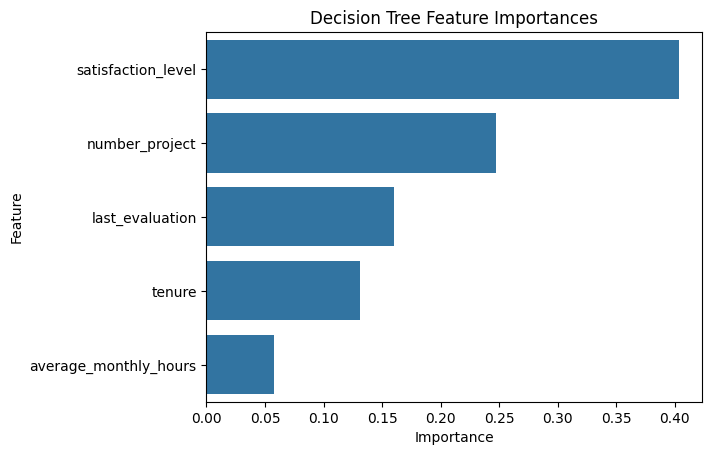

In [ ]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns=['importance'], index = X.columns)

tree1_importances = tree1_importances.sort_values(by='importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['importance'] != 0]

# Plot
sns.barplot(data=tree1_importances, x="importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree Feature Importances",fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

From the bar plot, we observe that the Decision Tree model did not utilize all features in the dataset for prediction. In fact, it relied on only five features, with `satisfaction_level` having the greatest impact. This result is reasonable—our earlier EDA indicated that employee dissatisfaction correlated with the decision to leave or being terminated of an employee. Therefore, it makes sense that this feature carries the most weight in the model’s decision-making process.

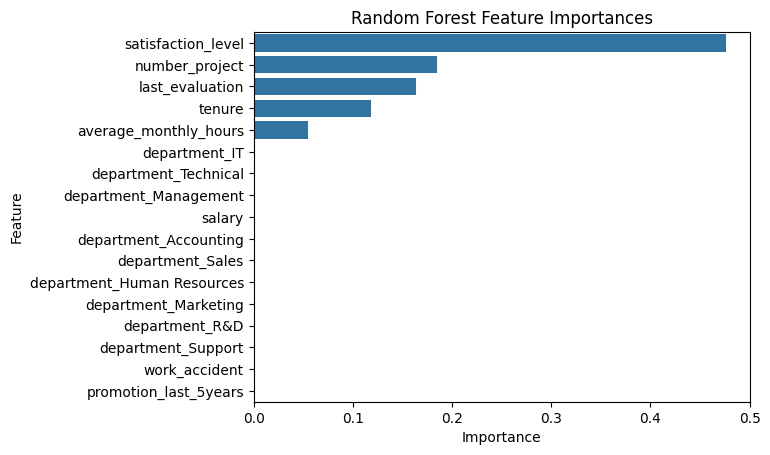

In [ ]:
rf1_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, columns=['importance'], index = X.columns)

rf1_importances = rf1_importances.sort_values(by='importance', ascending=False)

# Only extract the features with importances > 0
rf1_importances = rf1_importances[rf1_importances['importance'] != 0]

# Plot
sns.barplot(data=rf1_importances, x="importance", y=rf1_importances.index, orient='h')
plt.title("Random Forest Feature Importances",fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [ ]:
rf1_importances

importance
satisfaction_level            0.476257
number_project                0.184767
last_evaluation               0.163779
tenure                        0.118444
average_monthly_hours         0.054929
department_IT                 0.000472
department_Technical          0.000348
department_Management         0.000310
salary                        0.000267
department_Accounting         0.000134
department_Sales              0.000083
department_Human Resources    0.000080
department_Marketing          0.000046
department_R&D                0.000033
department_Support            0.000026
work_accident                 0.000023
promotion_last_5years         0.000003

A similar pattern is observed in the Random Forest model. The top five features identified in the Decision Tree model are also the most influential in the Random Forest model, and the order of their importance remains unchanged. However, unlike the Decision Tree—which relies solely on these five features—the Random Forest model incorporates a broader range of features in its predictions. That said, the additional features contribute only marginally, as their importance scores are close to zero.

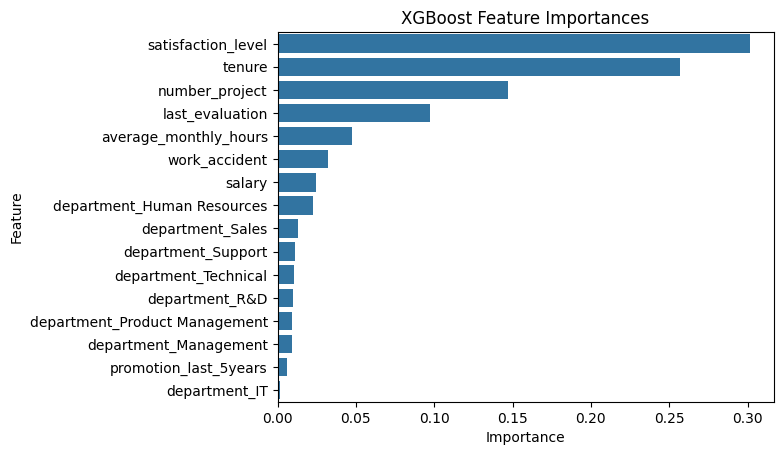

In [ ]:
xgb1_importances = pd.DataFrame(xgb1.best_estimator_.feature_importances_, columns=['importance'], index = X.columns)

xgb1_importances = xgb1_importances.sort_values(by='importance', ascending=False)

# Only extract the features with importances > 0
xgb1_importances = xgb1_importances[xgb1_importances['importance'] != 0]

# Plot
sns.barplot(data=xgb1_importances, x="importance", y=xgb1_importances.index, orient='h')
plt.title("XGBoost Feature Importances",fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [ ]:
xgb1_importances

importance
satisfaction_level               0.301516
tenure                           0.257033
number_project                   0.146907
last_evaluation                  0.097298
average_monthly_hours            0.047605
work_accident                    0.031993
salary                           0.024529
department_Human Resources       0.022752
department_Sales                 0.012772
department_Support               0.011029
department_Technical             0.010507
department_R&D                   0.009643
department_Product Management    0.009341
department_Management            0.009136
promotion_last_5years            0.006089
department_IT                    0.001850

In contrast, the XGBoost model exhibits a different pattern. While `satisfaction_level` remains the most influential feature, its importance has decreased by approximately 0.1–0.2 compared to the previous models. The five key features identified in the Decision Tree model are still present and still the most important, but their order has change. Most notably, `tenure` has become the second most important feature.

Additionally, features beyond these five play a more substantial role in XGBoost than they do in the Decision Tree or Random Forest models. This suggests that XGBoost leverages a broader range of information, potentially contributing to its higher predictive accuracy.



## FEATURE ENGINEERING

With the most important features identified, we can now engineer additional features that may enhance model performance or better reflect real-world.

### Workload

In previous exploration, we know that a heavy workload had a significant impact on employee's decision to quit, or in other instances, working under such pressure may cause them to underperform, resulted in their departure. So, we may indentify employees who overworked to examine the mentioned effect.

Assuming a standard work schedule of 8 hours per day, 5 days a week, and 50 working weeks per year (excluding holidays), the estimated average monthly working time is around 166.67 hours. For simplicity, we round this up and consider the average to be 170 hours per month.

The next step is to classify average working hour per month into 2 groups: overwork and not overwork. We hope that this approach will enhance the performance of the machine learning model

To do this, we will check if `average_monthly_hours` > 170 then mark as `overwork`. Since X_test is the hold-out dataset until final, we will not modify it now

In [40]:
# Not modify the original dataset
X_train_2 = X_train.copy()
X_val_2 = X_val.copy()

# Apply transformation only on the copies
for X in [X_train_2, X_val_2]:
    X['overwork'] = (X['average_monthly_hours'] > 170).astype(int)
    X.drop('average_monthly_hours', axis=1, inplace=True)

In [ ]:
X_train_2.head()

satisfaction_level  last_evaluation  number_project  tenure  \
6439                0.18             0.92               5       4   
7131                0.78             0.65               3       2   
4955                0.93             0.66               4       3   
3017                0.98             0.78               4       3   
8258                0.50             0.84               3       3   

      work_accident  promotion_last_5years  salary  department_Accounting  \
6439              0                      0       1                   True   
7131              0                      0       0                  False   
4955              0                      0       0                  False   
3017              1                      0       0                  False   
8258              1                      0       1                  False   

      department_Human Resources  department_IT  department_Management  \
6439                       False          False                  False   
7131                        True          False                  False   
4955                       False          False                  False   
3017                       False          False                  False   
8258                       False          False                  False   

      department_Marketing  department_Product Management  department_R&D  \
6439                 False                          False           False   
7131                 False                          False           False   
4955                 False                          False            True   
3017                 False                          False           False   
8258                 False                          False           False   

      department_Sales  department_Support  department_Technical  overwork  
6439             False               False                 False         1  
7131             False               False                 False         0  
4955             False               False                 False         1  
3017             False               False                  True         0  
8258              True               False                 False         1

In [ ]:
X_val_2.head()

satisfaction_level  last_evaluation  number_project  tenure  \
9243                 0.14             0.63               6       5   
7806                 0.12             0.82               5       4   
7245                 0.75             0.96               4       2   
10061                0.96             0.95               6       4   
11067                0.51             0.62               4       3   

       work_accident  promotion_last_5years  salary  department_Accounting  \
9243               0                      0       0                  False   
7806               1                      0       1                  False   
7245               0                      0       0                  False   
10061              0                      0       0                  False   
11067              0                      0       0                  False   

       department_Human Resources  department_IT  department_Management  \
9243                        False          False                  False   
7806                        False          False                  False   
7245                        False          False                  False   
10061                       False           True                  False   
11067                       False          False                   True   

       department_Marketing  department_Product Management  department_R&D  \
9243                  False                          False           False   
7806                  False                          False           False   
7245                  False                           True           False   
10061                 False                          False           False   
11067                 False                          False           False   

       department_Sales  department_Support  department_Technical  overwork  
9243               True               False                 False         1  
7806               True               False                 False         0  
7245              False               False                 False         0  
10061             False               False                 False         1  
11067             False               False                 False         1

#### Decision Tree

In [ ]:
# Assign a dictionary of hyperparameters to search over
cv_params = {
    'max_depth':[4, 6, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

# Instantiate GridSearch
tree2 = GridSearchCV(tree_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
tree2.fit(X_train_2, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# See the best estimator
tree2.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42)

In [ ]:
# See the best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

Compare to the previous tree1, the parameters changed

In [ ]:
# See the best ROC_AUC score
tree2.best_score_

np.float64(0.9700980339350382)

An ROC_AUC score of this tree is higher than tree1, suggesting that the modification may be useful.

In [ ]:
# Get scores from previous grid search
tree2_cv_results = make_results("Decision Tree CV 2",tree2,'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy      auc
0  Decision Tree CV   0.907672  0.912126  0.909726  0.969974  0.96931
                model  precision    recall        F1  accuracy       auc
0  Decision Tree CV 2   0.963659  0.904595  0.932912  0.978454  0.970098


The model demonstrates strong performance compared to tree1, with all evaluation metrics (except for Recall) increase and scoring relatively high. Therefore, we have evidence to believe that our implementations have positive impact on the tree model. Next, we will examine the XGBoost model

#### XGBOOST

In [ ]:
cv_params = {'max_depth': [4,5,6,7,8],
 'min_child_weight': [1,2,3,4,5],
 'learning_rate': [0.1, 0.2, 0.3],
 'n_estimators': [75, 100, 125]
}
xgb2 = GridSearchCV(xgb_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
xgb2.fit(X_train_2,y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
xgb2.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 75}

Compare to the previous xgb1, the parameters changed

In [ ]:
xgb2_cv_results = make_results("XGBoost CV 2",xgb2,'auc')
print(xgb1_cv_results)
print(xgb2_cv_results)
print(tree2_cv_results)

        model  precision    recall        F1  accuracy      auc
0  XGBoost CV   0.975316  0.915468  0.944198  0.982068  0.98592
          model  precision    recall        F1  accuracy       auc
0  XGBoost CV 2   0.964825  0.908773  0.935634  0.979288  0.983365
                model  precision    recall        F1  accuracy       auc
0  Decision Tree CV 2   0.963659  0.904595  0.932912  0.978454  0.970098


Comparing the scores, the second XGBoost model appears to perform slightly worse than the first, with lower values across all evaluation metrics. From this, we may be skeptical about the change made earlier. However, the scores are higher than of Decision Tree. Notice that the number of depth of second Decision Tree has increased, there is a chance that the model overfit, so we need to evaluate both on the validation set

In [ ]:
tree2_val_results = get_scores("Decision Tree Validation 2",tree2,X_val_2,y_val)
xgb2_val_results = get_scores("XGBoost Validation 2",xgb2,X_val_2,y_val)
pd.concat([tree2_val_results, xgb2_val_results], axis=0)

model  precision    recall        f1  accuracy  \
0  Decision Tree Validation 2   0.955497  0.917085  0.935897  0.979149   
0        XGBoost Validation 2   0.978495  0.914573  0.945455  0.982485   

        AUC  
0  0.977350  
0  0.988522

As shown in the table, the XGBoost model continues to outperform the Decision Tree model on the validation set. Although some differences in Recall are small, with XGBoost the lower, the overall performance — including higher scores in all metrics — supports the conclusion that the XGBoost model is better suited for our objective.

In [ ]:
xgb1_val_results

model  precision    recall        f1  accuracy       AUC
0  XGBoost Validation    0.97619  0.927136  0.951031  0.984153  0.992062

Based on the scores of 2 versions of XGBoost, it is hard to say whether the modification in overwork created a more precise model.

##### Save model

In [ ]:
import os
drive_folder_path = '/content/drive/My Drive/Colab Models'

model_filename = 'CapStoneProject_XGBoost_2'
full_model_path = os.path.join(drive_folder_path, model_filename)

# Save model to the specified path in Google Drive
print(f"Saving model to: {full_model_path}")
try:
    with open(full_model_path, 'wb') as file:
        pickle.dump(xgb1.best_estimator_, file)
    print("Model saved successfully!")
except Exception as e:
    print(f"Error saving model: {e}")


Saving model to: /content/drive/My Drive/Colab Models/CapStoneProject_XGBoost_2
Model saved successfully!


In [ ]:
# Load the model
print("\n--- Testing model loading ---")
try:
    with open(full_model_path, 'rb') as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: Model file not found at {full_model_path}. Make sure it was saved correctly.")
except Exception as e:
    print(f"Error loading model: {e}")

#### Random Forest

In [ ]:
 # Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5],
 'max_features': [1.0],
 'max_samples': [0.7, 1.0],
 'min_samples_leaf': [1,2,3],
 'min_samples_split': [2,3,4],
 'n_estimators': [500],
}

# Instantiate GridSearch
rf2 = GridSearchCV(rf_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
rf2.fit(X_train_2,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
rf2.best_estimator_

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=1.0,
                       min_samples_leaf=2, n_estimators=500, random_state=0)

In [ ]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf2.best_score_

np.float64(0.9786203430055378)

In [ ]:
rf2_cv_results = make_results("Random Forest CV 2",rf2,'auc')
print(rf1_cv_results)
print(rf2_cv_results)
print(xgb2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.954525  0.905431  0.928996  0.977063  0.979327
                model  precision    recall        F1  accuracy      auc
0  Random Forest CV 2   0.932406  0.910451  0.921069  0.974144  0.97862
          model  precision    recall        F1  accuracy       auc
0  XGBoost CV 2   0.964825  0.908773  0.935634  0.979288  0.983365


From the evaluation scores, we observe that although the recall of the Random Forest 2 model is slightly higher than that of the XGBoost 2, all other metrics lower.

Also, it is hard to determine whether the change we made earlier had a positive effect on the model's performance, since the metrics does not variate significantly.


In [ ]:
rf2_val_results = get_scores("Random Forest 2 Validation",rf2,X_val_2,y_val)
pd.concat([rf1_val_results, rf2_val_results], axis=0)

model  precision    recall        f1  accuracy  \
0    Random Forest Validation   0.948052  0.917085  0.932312  0.977898   
0  Random Forest 2 Validation   0.943152  0.917085  0.929936  0.977064   

        AUC  
0  0.988729  
0  0.983638

In [ ]:
xgb2_val_results

model  precision    recall        f1  accuracy       AUC
0  XGBoost Validation 2   0.978495  0.914573  0.945455  0.982485  0.988522

As shown in the table, compared to the earlier RF1 model, the metrics for RF2 show a slight decrease across most evaluation scores. This suggests that the recent feature engineering—such as replacing average_monthly_hours with overwork—may not have improved model performance for the Random Forest classifier.

The XGBoost CV 2 model continues to outperform both Random Forest variants on the validation set, achieving higher. This performance reinforces the conclusion that XGBoost remains the most suitable model for our classification task.

##### Save model

In [ ]:
import os
drive_folder_path = '/content/drive/My Drive/Colab Models'

model_filename = 'CapStoneProject_RandomForest_2'
full_model_path = os.path.join(drive_folder_path, model_filename)

# Save model to the specified path in Google Drive
print(f"Saving model to: {full_model_path}")
try:
    with open(full_model_path, 'wb') as file:
        pickle.dump(rf1.best_estimator_, file)
    print("Model saved successfully!")
except Exception as e:
    print(f"Error saving model: {e}")


Saving model to: /content/drive/My Drive/Colab Models/CapStoneProject_RandomForest_2
Model saved successfully!


In [ ]:
# Load the model
print("\n--- Testing model loading ---")
try:
    with open(full_model_path, 'rb') as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: Model file not found at {full_model_path}. Make sure it was saved correctly.")
except Exception as e:
    print(f"Error loading model: {e}")

### Reconsider the data collection process

There is a limitation in our project stemming from the lack of access to the data collection procedure. This raises concerns about two key features:

- `satisfaction_level`: This feature likely varies depending on when it was collected. If the satisfaction score was recorded after an employee had already decided to leave or fired, it could not reflect their true state during employment.

- `average_monthly_hours`: Similarly, this value may be an aggregate over the full tenure of the employee. If it includes periods after an employee had mentally disengaged or decided to resign, it may not reflect the conditions that preceded their decision. This would again distort its predictive value.

Considering the worst-case scenario, we may need to exclude both `satisfaction_level` and `average_monthly_hours` from the final model used in deployment. This is due to their potential for data leakage and uncertain collection timing.

However, we propose to remove only the `satisfaction_level` feature. Among the two, it poses a greater risk, as it is highly sensitive to when the data was recorded.

On the other hand, `average_monthly_hours` has already been transformed into a binary `overwork` indicator, which minimizes some of the leakage risk. This feature still captures meaningful behavioral patterns: even if an employee works fewer hours overall, crossing the overwork threshold may closely linked to resignation or termination.




In [41]:
X_train_3 = X_train_2.drop(columns='satisfaction_level')
X_val_3 = X_val_2.drop(columns='satisfaction_level')

In [42]:
print(X_train_3.columns)
print(X_val_3.columns)

Index(['last_evaluation', 'number_project', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'department_Accounting',
       'department_Human Resources', 'department_IT', 'department_Management',
       'department_Marketing', 'department_Product Management',
       'department_R&D', 'department_Sales', 'department_Support',
       'department_Technical', 'overwork'],
      dtype='object')
Index(['last_evaluation', 'number_project', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'department_Accounting',
       'department_Human Resources', 'department_IT', 'department_Management',
       'department_Marketing', 'department_Product Management',
       'department_R&D', 'department_Sales', 'department_Support',
       'department_Technical', 'overwork'],
      dtype='object')


#### XGBOOST

In [46]:
xgb_clf = XGBClassifier(objective='binary:logistic', random_state = 42)
cv_params = {'max_depth': [4,5,6,7,8],
 'min_child_weight': [1,2,3,4,5],
 'learning_rate': [0.1, 0.2, 0.3],
 'n_estimators': [75, 100, 125]
}
xgb3 = GridSearchCV(xgb_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [47]:
xgb3.fit(X_train_3,y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
xgb3.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 75}

In [ ]:
xgb3_cv_results = make_results("XGBoost CV 3",xgb3,'auc')
print(xgb1_cv_results)
print(xgb2_cv_results)
print(xgb3_cv_results)

        model  precision    recall        F1  accuracy      auc
0  XGBoost CV   0.975316  0.915468  0.944198  0.982068  0.98592
          model  precision    recall        F1  accuracy       auc
0  XGBoost CV 2   0.964825  0.908773  0.935634  0.979288  0.983365
          model  precision    recall        F1  accuracy       auc
0  XGBoost CV 3     0.9029  0.870278  0.886042  0.962885  0.972649


When comparing the evaluation scores across models, we observe a gradual decrease in performance following the feature modifications.

However, the encouraging result is that the third XGBoost model still achieves high scores across all metrics. This indicates that even with stricter feature selection, the model retains strong predictive power.

Overall, this suggests that the XGBoost model remains robust and generalizable, making it a strong candidate for future deployment on unseen data.

##### Save model

In [ ]:
import os
drive_folder_path = '/content/drive/My Drive/Colab Models'

model_filename = 'CapStoneProject_XGBoost_3'
full_model_path = os.path.join(drive_folder_path, model_filename)

# Save model to the specified path in Google Drive
print(f"Saving model to: {full_model_path}")
try:
    with open(full_model_path, 'wb') as file:
        pickle.dump(xgb1.best_estimator_, file)
    print("Model saved successfully!")
except Exception as e:
    print(f"Error saving model: {e}")


Saving model to: /content/drive/My Drive/Colab Models/CapStoneProject_XGBoost_3
Model saved successfully!


In [ ]:
# Load the model
print("\n--- Testing model loading ---")
try:
    with open(full_model_path, 'rb') as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: Model file not found at {full_model_path}. Make sure it was saved correctly.")
except Exception as e:
    print(f"Error loading model: {e}")

We will also examine the rest 2 models

#### Decision Tree

In [48]:
# Assign a dictionary of hyperparameters to search over
cv_params = {
    'max_depth':[4, 6, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

# Instantiate GridSearch
tree3 = GridSearchCV(tree_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [49]:
tree3.fit(X_train_3, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# See the best estimator
tree3.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=42)

In [ ]:
# See the best parameters
tree3.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [ ]:
# See the best ROC_AUC score
tree3.best_score_

np.float64(0.9519828450892471)

In [ ]:
# Get scores from previous grid search
tree3_cv_results = make_results("Decision Tree CV 3",tree3,'auc')
print(tree1_cv_results)
print(tree2_cv_results)
print(tree3_cv_results)

              model  precision    recall        F1  accuracy      auc
0  Decision Tree CV   0.907672  0.912126  0.909726  0.969974  0.96931
                model  precision    recall        F1  accuracy       auc
0  Decision Tree CV 2   0.963659  0.904595  0.932912  0.978454  0.970098
                model  precision    recall       F1  accuracy       auc
0  Decision Tree CV 3   0.820489  0.907118  0.86074  0.951072  0.951983


According to the evaluation table, the third Decision Tree model shows a significant drop in performance metrics compared to its previous versions.

Such a drop suggests that the model is highly sensitive to feature changes, which is typical for Decision Tree models. As a result, the model demonstrates limited robustness and generalizability, making it unsuitable for future deployment.



#### Random Forest

In [50]:
 # Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5],
 'max_features': [1.0],
 'max_samples': [0.7, 1.0],
 'min_samples_leaf': [1,2,3],
 'min_samples_split': [2,3,4],
 'n_estimators': [500],
}

# Instantiate GridSearch
rf3 = GridSearchCV(rf_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [51]:
rf3.fit(X_train_3,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
rf3.best_estimator_

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=1.0,
                       n_estimators=500, random_state=0)

In [ ]:
rf3.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf3.best_score_

np.float64(0.9637491593355813)

In [ ]:
rf3_cv_results = make_results("Random Forest CV 3",rf3,'auc')
print(rf1_cv_results)
print(rf2_cv_results)
print(rf3_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.954525  0.905431  0.928996  0.977063  0.979327
                model  precision    recall        F1  accuracy      auc
0  Random Forest CV 2   0.932406  0.910451  0.921069  0.974144  0.97862
                model  precision    recall        F1  accuracy       auc
0  Random Forest CV 3   0.865736  0.900415  0.882664  0.960244  0.963749


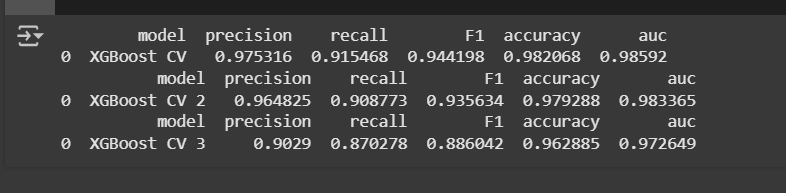

Looking more closely, the Random Forest model shows a performance pattern similar to that of the XGBoost model. Most evaluation metrics decrease as feature modifications are applied. The notable exception is recall, which slightly increases in the latest version. This behavior is expected and not a concern, as the overall performance remains strong, and the modified features were intentionally removed or simplified to improve generalization.

When comparing the earliest and latest versions of both models, we observe that XGBoost exhibits slightly lower performance variation across metrics. This suggests that XGBoost may be more robust to changes, an important quality for a model intended for deployment.

That said, before finalizing a decision between XGBoost and Random Forest, we should also examine how all three models—including the Decision Tree—perform on the validation set.



##### Save model

In [ ]:
import os
drive_folder_path = '/content/drive/My Drive/Colab Models'

model_filename = 'CapStoneProject_RandomForest_3'
full_model_path = os.path.join(drive_folder_path, model_filename)

# Save model to the specified path in Google Drive
print(f"Saving model to: {full_model_path}")
try:
    with open(full_model_path, 'wb') as file:
        pickle.dump(rf1.best_estimator_, file)
    print("Model saved successfully!")
except Exception as e:
    print(f"Error saving model: {e}")


Saving model to: /content/drive/My Drive/Colab Models/CapStoneProject_RandomForest_3
Model saved successfully!


In [ ]:
# Load the model
print("\n--- Testing model loading ---")
try:
    with open(full_model_path, 'rb') as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: Model file not found at {full_model_path}. Make sure it was saved correctly.")
except Exception as e:
    print(f"Error loading model: {e}")

#### Choosing the champion model

In [52]:
tree3_val_results = get_scores("Decision Tree 3 Validation",tree3,X_val_3,y_val)
rf3_val_results = get_scores("Random Forest 3 Validation",rf3,X_val_3,y_val)
xgb3_val_results = get_scores("XGBoost 3 Validation",xgb3,X_val_3,y_val)
pd.concat([tree3_val_results, rf3_val_results,xgb3_val_results], axis=0)

model  precision    recall        f1  accuracy  \
0  Decision Tree 3 Validation   0.780911  0.904523  0.838184  0.942035   
0  Random Forest 3 Validation   0.855107  0.904523  0.879121  0.958716   
0        XGBoost 3 Validation   0.893671  0.886935  0.890290  0.963720   

        AUC  
0  0.959910  
0  0.967690  
0  0.978415

Among the three models evaluated—Decision Tree, Random Forest, and XGBoost—the XGBoost model consistently demonstrates the best overall performance. While its recall score is slightly lower than that of the latest Random Forest model, it outperforms both alternatives across all other metrics.

Given these results, the XGBoost model is selected as the champion model for final testing on the holdout (test) dataset.

## REFIT AND TESTING

In [53]:
# Not modify the original dataset
X_train_final = X_tr.copy()  #include both training and validation data
X_test_final = X_test.copy()

# Apply transformation only on the copies
for X in [X_train_final, X_test_final]:
    X['overwork'] = (X['average_monthly_hours'] > 170).astype(int)
    X.drop(['average_monthly_hours','satisfaction_level'], axis=1, inplace=True)


In [54]:
print(X_train_final.columns)
print(X_test_final.columns)

Index(['last_evaluation', 'number_project', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'department_Accounting',
       'department_Human Resources', 'department_IT', 'department_Management',
       'department_Marketing', 'department_Product Management',
       'department_R&D', 'department_Sales', 'department_Support',
       'department_Technical', 'overwork'],
      dtype='object')
Index(['last_evaluation', 'number_project', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'department_Accounting',
       'department_Human Resources', 'department_IT', 'department_Management',
       'department_Marketing', 'department_Product Management',
       'department_R&D', 'department_Sales', 'department_Support',
       'department_Technical', 'overwork'],
      dtype='object')


In [55]:
xgb3.fit(X_train_final,y_tr)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [56]:
xgb3.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, ...)

In [57]:
xgb3.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 75}

In [62]:
y_pred = xgb3.best_estimator_.predict(X_test_final)
y_proba = xgb3.best_estimator_.predict_proba(X_test_final)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.91      0.91      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399

AUC: 0.9712260703818945


In [60]:
final_test_scores = get_scores('Final model test',xgb3,X_test_final,y_test)
final_test_scores

model  precision    recall        f1  accuracy       AUC
0  Final model test   0.907268  0.909548  0.908407  0.969571  0.971226

Based on the statistical metrics, the model demonstrates strong overall performance across all evaluation scores. However, it performs slightly better on the negative class (employees who stayed), which is expected due to the class imbalance in the dataset.

While balancing the outcome classes (e.g., through resampling) could potentially improve performance on the positive class, the current differences are not substantial enough. To avoid introducing bias and maintain generalizability to the test set, we can proceed with the current model.

We will include a feature importance plot

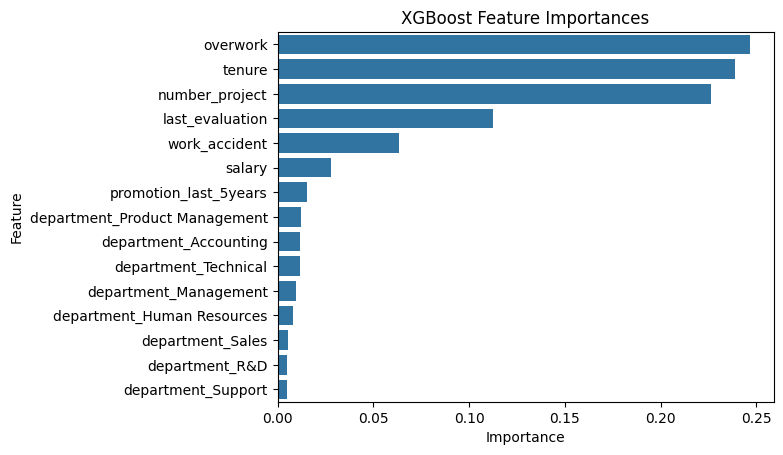

In [64]:
xgb_importances = pd.DataFrame(xgb3.best_estimator_.feature_importances_, columns=['importance'], index = X.columns)

xgb_importances = xgb_importances.sort_values(by='importance', ascending=False)

# Only extract the features with importances > 0
xgb_importances = xgb_importances[xgb_importances['importance'] != 0]

# Plot
sns.barplot(data=xgb_importances, x="importance", y=xgb_importances.index, orient='h')
plt.title("XGBoost Feature Importances",fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### **Model Evaluation Summary**
After performing feature engineering to address potential data leakage—specifically by removing satisfaction_level and replacing average_monthly_hours with a binary overwork feature—we retrained the final XGBoost model on the full training dataset (including validation data). The model was then evaluated on the hold-out test set.

Test Set Performance:
- Accuracy: 97%
- Precision:
  + Class 0 (Stayed): 0.98
  + Class 1 (Left): 0.91
- Recall:
  + Class 0: 0.98
  + Class 1: 0.91
- F1 Score:
  + Class 0: 0.98
  + Class 1: 0.91
- AUC (Area Under ROC Curve): 0.971

Feature Importance: Top 3 most important features: `overwork` (newly engineered), `tenure`, `number_project`. These top features suggest that length of employment, whether an employee is overworked, and how many projects they handle are critical to predicting turnover. It support the previous conclusions through EDA about two main problems.

Conclusion:
The final XGBoost model demonstrates strong performance across both classes, even after the removal of sensitive or potentially unreliable features. Its high precision and recall make it a reliable choice for deployment in predicting employee attrition.

# **SUGGESTION AND NEXT STEPS**
Look back into 2 key problems:


## **Key problems**
1. Imbalance Between Performance and Recognition
  
  - High-performing employees (high evaluation, many projects, long hours) still leave—especially without promotion.
  
  - Lack of career advancement or recognition appears to be a major driver of dissatisfaction and turnover.

2. Excessive and Poorly Managed Workload

  - Increased workload correlates with low satisfaction and resignation.

  - Employees who take on more work without reward are more likely to leave.



## **Recommendations**
To address these problems, here are some recommendations for stakeholders:

1. **Address the Performance–Recognition Gap**

  - Problem: High-performing employees leave due to lack of promotion or recognition.

  - Recommendations:

    + Establish transparent promotion criteria and communicate them clearly.

    + Introduce structured performance reviews that include career development planning.

    + Launch formal recognition programs (e.g., performance bonuses, awards, public praise).

    + Identify high-potential employees early and map them to growth opportunities.

2. **Manage Workload to Prevent Burnout**
  - Problem: Excessive workload without reward reduces satisfaction and increases turnover.

  - Recommendations:

    + Implement workload tracking tools to detect and prevent overworking.

    + Link additional responsibilities to incentives such as bonuses or career advancement.

    + Train managers to identify signs of burnout and redistribute tasks proactively.

## **Next steps**

1. **Validate Key Hypotheses**

  - Investigate the delayed resignation pattern and its link to satisfaction and workload.

2. **Prevent Data Leakage**

  - Carefully manage data splits and sampling to avoid future information leaking into training.

3. **Enhance Feature Engineering**

  - Add new features such as workload trends, promotion gaps, and interaction terms to improve model insights.

4. **Apply Insights to Policy**

  - Use model predictions, insights to support retention-focused strategies.